# Load and Calculations

In [1]:
import pickle
import numpy as np
from multiprocessing import Pool
import requests, json
import pandas as pd
import glob
import time
from multiprocessing import Pool
import numpy as np
from scipy import stats

def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
from zipfile import ZipFile
import re
import xmlschema
from pprint import pprint
import glob
# importing element tree
import lxml.etree as etree
import pickle

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.xticks(fontsize=ff-4)
    plt.yticks(fontsize=ff-4)

import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.transforms as mtransforms
sns.set_theme(style='white')


%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
sns.set_context('talk', font_scale=.65)
mpl.rcParams.update({'text.usetex': False})


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'

/mnt/sdb1/sandeep/.local/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


- ensured no preprints in data : ARXIV, BIOARXIV, MEDARXIV 


In [2]:
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
significant_cores3={}
PAPERS_TOGETHER=3

for gsize in range(2,10):
    print(gsize,end='\r')
    with open(path_career+'significant_cores3_size'+str(gsize)+'(whole).pkl', 'rb') as f:
        significant_cores3[gsize]=pickle.load(f) 
        significant_cores3[gsize]=significant_cores3[gsize][significant_cores3[gsize]['w']>PAPERS_TOGETHER]
    significant_cores3[gsize]['size']=gsize

### Publication year by Team

In [3]:
t_ic = time.time();
maxS=8
first_={}
last_={}
for gsize in range(2,10):
    print(gsize,end='\r')
    first_[gsize]=[]
    last_[gsize]=[]
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        pub_years=pickle.load(f) 
              
    for n in range(len(I)-1):        
        a=pub_years[I[n]:I[n+1]]
        first_[gsize].append(a[0])
        last_[gsize].append(a[len(a)-1])
#         b=pub_years[I[n]:I[n+1]]

#-----------------------------

for gsize in range(2,10):
    print(gsize,end='\r')
    significant_cores3[gsize]['first_paper_pubyear']=first_[gsize]
    significant_cores3[gsize]['last_paper_pubyear']=last_[gsize]

    
    with open(path_career+'dict_first_paper_pubyear'+str(gsize)+'.pkl', 'wb') as f:
        pickle.dump(first_[gsize], f) 
    with open(path_career+'dict_last_paper_pubyear'+str(gsize)+'.pkl', 'wb') as f:
        pickle.dump(last_[gsize], f) 
#-----------------------------
# for gsize in range(2,10):
    
#     with open(path_career+'dict_first_paper_pubyear'+str(gsize)+'.pkl', 'rb') as f:
#         x=pickle.load(f)
#     significant_cores3[gsize]['first_paper_pubyear']=x
#     with open(path_career+'dict_last_paper_pubyear'+str(gsize)+'.pkl', 'rb') as f:
#         y=pickle.load(f)
#     significant_cores3[gsize]['last_paper_pubyear']=y

#-----------------------------

### fraction of one shot teams (3)

In [4]:
for gsize in range(2,maxS):
    print(gsize,end='\r')
    team_first_time=list(significant_cores3[gsize]['first_paper_pubyear'])

    with open(path_career+'sfirstpubtogether'+str(gsize)+'.pkl', 'rb') as f:
        sfirstpubtogether=pickle.load(f) 
#     is_formed_in_one_shot=np.array([round(np.min(sfirstpubtogether[it]),0)==round(team_first_time[it],0) for it in range(len(team_first_time))])
    is_formed_in_one_shot=np.array([len(np.unique(sfirstpubtogether[it]))==1 for it in range(len(sfirstpubtogether))])
    significant_cores3[gsize]['is_formed_in_one_shot']=(is_formed_in_one_shot==True)

### dict_pairs_firstpubtogether

In [141]:
# with open(path_career+'dict_firstpub.pkl', 'rb') as f:
#     dict_firstpub=pickle.load(f) 
# auth_to_firstpubyear=dict_firstpub

# with open(path_career+'dict_pubdate.pkl', 'rb') as f:
#     dict_pubdate=pickle.load(f) 
# paper_to_pubyear=dict_pubdate

### set c5

 - remove papers with pub_year>2018 
 (2023 - 5= 2018)

In [142]:

for gsize in range(2,maxS):
    print(gsize,end='\r')

#     with open(path_career+'significant_cores(c5norm)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
#         c5=pickle.load(f) 
#     with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
#         I=pickle.load(f) 
    with open(path_career+'significant_cores(w2018)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        significant_cores3[gsize]['https://docs.google.com/spreadsheets/d/1acXm1cho9grOSEz2Udk2AQaC4yPIiKDBsc9fKi-Ke0c/edit#gid=1281969688'] =pickle.load(f) 
    with open(path_career+'significant_cores(c5_mean)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        significant_cores3[gsize]['c5_av'] =pickle.load(f) 
    with open(path_career+'significant_cores(c5_half1)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        significant_cores3[gsize]['c5_half1'] =pickle.load(f) 
    with open(path_career+'significant_cores(c5_half2)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        significant_cores3[gsize]['c5_half2'] =pickle.load(f) 
    with open(path_career+'significant_cores(c5_first)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        significant_cores3[gsize]['c5_first'] =pickle.load(f) 

In [143]:
for gsize in range(2,maxS):
    print(gsize,end='\r')

    with open(path_career+'significant_cores(c5norm)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        c5=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    break

In [144]:
import random
f_high=[]
f_high_shuffled=[]
for n in range(200000):
    x=c5[I[n]:I[n+1]]
    if np.mean(x)>0 and len(x)>5:
#         print(n,'---',np.where(np.max(x)==x)[0])
        f_high.append(np.where(np.max(x)==x)[0][0]/len(x))
        y=random.sample(sorted(x), len(x))
        f_high_shuffled.append(np.where(np.max(y)==y)[0][0]/len(y))

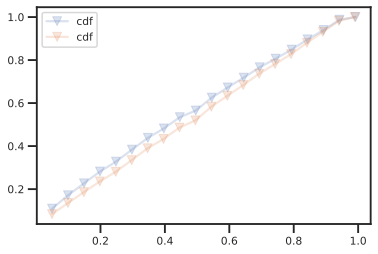

In [145]:
# plt.hist(f_high,alpha=.2)
# plt.hist(f_high_shuffled,alpha=.2);
def plotCDF(data):
    count, bins_count = np.histogram(data, bins=20)
    # finding the PDF of the histogram using count values
    pdf = count / sum(count)
    # using numpy np.cumsum to calculate the CDF
    # We can also find using the PDF values by looping and adding
    cdf = np.cumsum(pdf)
    # plotting PDF and CDF
#     plt.plot(bins_count[1:], pdf, color="red", label="PDF")
    plt.plot(bins_count[1:], cdf,'v-', label="cdf",alpha=.2);
    plt.legend()
plotCDF(f_high)
plotCDF(f_high_shuffled)

### set exclusivity

In [146]:
with open(path_career+'work_counts_UNION.pkl', 'rb') as f:
        work_counts_UNION=pickle.load(f) 
for  gsize in range(2,maxS):
    significant_cores3[gsize]['work_counts_UNION']=work_counts_UNION[gsize]
    significant_cores3[gsize]['exclusivity']=np.divide(significant_cores3[gsize]['w'],significant_cores3[gsize]['work_counts_UNION'])


### set core diversity

In [147]:
with open(path_career+'dict_significant_core_diversity.pkl', 'rb') as f:
    dict_significant_core_diversity=pickle.load(f) 
for gsize in range(2,maxS):
    significant_cores3[gsize]['core_diversity']=dict_significant_core_diversity[gsize]

### set literature search quants

In [148]:
corelitD={};corelitB={};corelitP={};
for gsize in range(2,maxS):
    with open(path_career+'significant_cores(litBreadth)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        litBreadth=pickle.load(f)
    with open(path_career+'significant_cores(litDepth)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        litDepth=pickle.load(f) 
    with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        pubyears =pickle.load(f) 
    litDepth=pubyears-litDepth
    with open(path_career+'significant_cores(litPopularity)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        litPopularity=pickle.load(f) 


    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    print(gsize,end='\r')
    corelitD[gsize]=[np.nanmean(litDepth[I[n]:I[n+1]]) for n in range(len(I)-1)]
    corelitB[gsize]=[np.nanmean(litBreadth[I[n]:I[n+1]]) for n in range(len(I)-1)]
    corelitP[gsize]=[np.nanmean(litPopularity[I[n]:I[n+1]]) for n in range(len(I)-1)]

    significant_cores3[gsize]['corelitP']=corelitP[gsize]
    significant_cores3[gsize]['corelitD']=corelitD[gsize]
    significant_cores3[gsize]['corelitB']=corelitB[gsize]

<ipython-input-148-d9c623fd0612>:17: RuntimeWarning: Mean of empty slice
  corelitD[gsize]=[np.nanmean(litDepth[I[n]:I[n+1]]) for n in range(len(I)-1)]
<ipython-input-148-d9c623fd0612>:18: RuntimeWarning: Mean of empty slice
  corelitB[gsize]=[np.nanmean(litBreadth[I[n]:I[n+1]]) for n in range(len(I)-1)]
<ipython-input-148-d9c623fd0612>:19: RuntimeWarning: Mean of empty slice
  corelitP[gsize]=[np.nanmean(litPopularity[I[n]:I[n+1]]) for n in range(len(I)-1)]


<ipython-input-148-d9c623fd0612>:17: RuntimeWarning: Mean of empty slice
  corelitD[gsize]=[np.nanmean(litDepth[I[n]:I[n+1]]) for n in range(len(I)-1)]
<ipython-input-148-d9c623fd0612>:18: RuntimeWarning: Mean of empty slice
  corelitB[gsize]=[np.nanmean(litBreadth[I[n]:I[n+1]]) for n in range(len(I)-1)]
<ipython-input-148-d9c623fd0612>:19: RuntimeWarning: Mean of empty slice
  corelitP[gsize]=[np.nanmean(litPopularity[I[n]:I[n+1]]) for n in range(len(I)-1)]


<ipython-input-148-d9c623fd0612>:17: RuntimeWarning: Mean of empty slice
  corelitD[gsize]=[np.nanmean(litDepth[I[n]:I[n+1]]) for n in range(len(I)-1)]
<ipython-input-148-d9c623fd0612>:18: RuntimeWarning: Mean of empty slice
  corelitB[gsize]=[np.nanmean(litBreadth[I[n]:I[n+1]]) for n in range(len(I)-1)]
<ipython-input-148-d9c623fd0612>:19: RuntimeWarning: Mean of empty slice
  corelitP[gsize]=[np.nanmean(litPopularity[I[n]:I[n+1]]) for n in range(len(I)-1)]


<ipython-input-148-d9c623fd0612>:17: RuntimeWarning: Mean of empty slice
  corelitD[gsize]=[np.nanmean(litDepth[I[n]:I[n+1]]) for n in range(len(I)-1)]
<ipython-input-148-d9c623fd0612>:18: RuntimeWarning: Mean of empty slice
  corelitB[gsize]=[np.nanmean(litBreadth[I[n]:I[n+1]]) for n in range(len(I)-1)]
<ipython-input-148-d9c623fd0612>:19: RuntimeWarning: Mean of empty slice
  corelitP[gsize]=[np.nanmean(litPopularity[I[n]:I[n+1]]) for n in range(len(I)-1)]


<ipython-input-148-d9c623fd0612>:17: RuntimeWarning: Mean of empty slice
  corelitD[gsize]=[np.nanmean(litDepth[I[n]:I[n+1]]) for n in range(len(I)-1)]
<ipython-input-148-d9c623fd0612>:18: RuntimeWarning: Mean of empty slice
  corelitB[gsize]=[np.nanmean(litBreadth[I[n]:I[n+1]]) for n in range(len(I)-1)]
<ipython-input-148-d9c623fd0612>:19: RuntimeWarning: Mean of empty slice
  corelitP[gsize]=[np.nanmean(litPopularity[I[n]:I[n+1]]) for n in range(len(I)-1)]


<ipython-input-148-d9c623fd0612>:17: RuntimeWarning: Mean of empty slice
  corelitD[gsize]=[np.nanmean(litDepth[I[n]:I[n+1]]) for n in range(len(I)-1)]
<ipython-input-148-d9c623fd0612>:18: RuntimeWarning: Mean of empty slice
  corelitB[gsize]=[np.nanmean(litBreadth[I[n]:I[n+1]]) for n in range(len(I)-1)]
<ipython-input-148-d9c623fd0612>:19: RuntimeWarning: Mean of empty slice
  corelitP[gsize]=[np.nanmean(litPopularity[I[n]:I[n+1]]) for n in range(len(I)-1)]


### set persistence time of core

In [149]:
for gsize in range(2,maxS):
    significant_cores3[gsize]['persistance_time']=significant_cores3[gsize]['last_paper_pubyear']-significant_cores3[gsize]['first_paper_pubyear']


### set fraction of young researchers in core (age < 5)

In [150]:
ageatformation={}
for gsize in range(2,maxS):
    print(gsize,end='\r')

    with open(path_career+'significant_cores(ages)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        ages=pickle.load(f)
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        pub_years=pickle.load(f) 
    x =[]
    for n in range(len(I)-1):
        x.append(ages[I[n]])
    ageatformation[gsize]=np.array(x)

In [151]:
for gsize in range(2,maxS):
    significant_cores3[gsize]['frac_young']=np.sum(ageatformation[gsize]<=5,axis=1)/gsize
    significant_cores3[gsize]['frac_midage']=np.sum((ageatformation[gsize]>5)&(ageatformation[gsize]<=15),axis=1)/gsize
    significant_cores3[gsize]['frac_oldage']=np.sum((ageatformation[gsize]>15),axis=1)/gsize

### set max age gap in core and standard deviation


In [152]:
ageatformation={}
for gsize in range(2,maxS):
    print(gsize,end='\r')

    with open(path_career+'significant_cores(ages)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        ages=pickle.load(f)
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
#     with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
#         pub_years=pickle.load(f) 

    AgeDev=np.nanstd(ages[I[0:-1]],axis=1)
    MaxAgeGap=np.nanmax(ages[I[0:-1]], axis= 1)-np.nanmin(ages[I[0:-1]], axis= 1)
    MeanAge=np.nanmean(ages[I[0:-1]], axis= 1)-np.nanmin(ages[I[0:-1]], axis= 1)

    significant_cores3[gsize]['AgeDev']=AgeDev
    significant_cores3[gsize]['MaxAgeGap']=MaxAgeGap
    significant_cores3[gsize]['MeanAge']=MeanAge

/mnt/sdb1/sandeep/miniconda3/envs/sos/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-152-7805a76ca152>:13: RuntimeWarning: All-NaN slice encountered
  MaxAgeGap=np.nanmax(ages[I[0:-1]], axis= 1)-np.nanmin(ages[I[0:-1]], axis= 1)
<ipython-input-152-7805a76ca152>:14: RuntimeWarning: Mean of empty slice
  MeanAge=np.nanmean(ages[I[0:-1]], axis= 1)-np.nanmin(ages[I[0:-1]], axis= 1)
<ipython-input-152-7805a76ca152>:14: RuntimeWarning: All-NaN slice encountered
  MeanAge=np.nanmean(ages[I[0:-1]], axis= 1)-np.nanmin(ages[I[0:-1]], axis= 1)
/mnt/sdb1/sandeep/miniconda3/envs/sos/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-152-7805a76ca152>:13: RuntimeWarning: All-NaN slice encountered
  MaxAgeGap=np.nanmax(ages[I[0

<ipython-input-152-7805a76ca152>:14: RuntimeWarning: Mean of empty slice
  MeanAge=np.nanmean(ages[I[0:-1]], axis= 1)-np.nanmin(ages[I[0:-1]], axis= 1)
<ipython-input-152-7805a76ca152>:14: RuntimeWarning: All-NaN slice encountered
  MeanAge=np.nanmean(ages[I[0:-1]], axis= 1)-np.nanmin(ages[I[0:-1]], axis= 1)
/mnt/sdb1/sandeep/miniconda3/envs/sos/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-152-7805a76ca152>:13: RuntimeWarning: All-NaN slice encountered
  MaxAgeGap=np.nanmax(ages[I[0:-1]], axis= 1)-np.nanmin(ages[I[0:-1]], axis= 1)
<ipython-input-152-7805a76ca152>:14: RuntimeWarning: Mean of empty slice
  MeanAge=np.nanmean(ages[I[0:-1]], axis= 1)-np.nanmin(ages[I[0:-1]], axis= 1)
<ipython-input-152-7805a76ca152>:14: RuntimeWarning: All-NaN slice encountered
  MeanAge=np.nanmean(ages[I[0:-1]], axis= 1)-np.nanmin(ages[I[0:-1]], axis= 1)
/mnt/sdb1/

In [153]:
# significant_cores3[2]

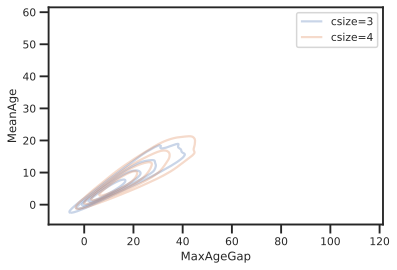

In [154]:
significant_cores3[2]
for gsize in range(3,5):
    print(gsize,end='\r')
    sns.kdeplot(    data=significant_cores3[gsize].iloc[0:2000], x="MaxAgeGap", y="MeanAge", levels=5, thresh=.2,alpha=.3,label='csize='+str(gsize),)
plt.legend()
    #     sns.kdeplot(    data=significant_cores3[gsize].iloc[0:5000], x="MaxAgeGap", y="MeanAge", levels=5, thresh=.2,alpha=.3)
# sns.kdeplot(    data=significant_cores3[2].iloc[0:1000], x="MaxAgeGap", y="MeanAge", levels=5, thresh=.2,alpha=.3)
# sns.kdeplot(    data=geyser, x="waiting", y="duration", hue="kind", fill=True,)

In [155]:
agegroups_within_core=[]

gsize=6
A=significant_cores3[gsize]

print(round(A[A['frac_young']==1].shape[0]/A.shape[0]*100,1))
print(round(A[A['frac_midage']==1].shape[0]/A.shape[0]*100,1))
print(round(A[A['frac_oldage']==1].shape[0]/A.shape[0]*100,1))
print(round(A[(A['frac_young']+A['frac_midage']==1) & (A['frac_young']<1)& (A['frac_midage']<1)].shape[0]/A.shape[0]*100,1))
print(round(A[(A['frac_oldage']+A['frac_midage']==1) & (A['frac_oldage']<1)& (A['frac_midage']<1)].shape[0]/A.shape[0]*100,1))
print(round(A[(A['frac_young']+A['frac_oldage']==1) & (A['frac_young']<1)& (A['frac_oldage']<1)].shape[0]/A.shape[0]*100,1))


# print(round(A[A['frac_oldage']+A['frac_midage']==1].shape[0]/A.shape[0]*100,1))
# print(round(A[A['frac_young']+A['frac_oldage']==1].shape[0]/A.shape[0]*100,1))


0.4
0.5
3.6
5.7
31.5
6.6


move this to lower part of the notebook. also find the figure type that is best. last state- similar to the current age figure in paper. 7 categories in legend (pure 3, mix 4) for each core type.  

### set non-core ages

In [13]:

for gsize in range(2,maxS):
    print(gsize,end='\r')

    with open(path_career+'significant_cores(agesnoncore)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        ages_noncore=pickle.load(f)
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 

    frac_young=[];frac_midage=[];frac_oldage=[];
    for n in range(len(I)-1):
        x=np.concatenate(ages_noncore[I[n]:I[n+1]])
        frac_young.append(np.sum(x<=5)/(len(x)))
        frac_midage.append(np.sum((x>5)&(x<=15))/(len(x)))
        frac_oldage.append(np.sum(x>15)/(len(x)))
        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r') 
    significant_cores3[gsize]['noncore_frac_young']=frac_young
    significant_cores3[gsize]['noncore_frac_midage']=frac_midage
    significant_cores3[gsize]['noncore_frac_oldage']=frac_oldage

<ipython-input-13-f80e5be655f6>:12: RuntimeWarning: invalid value encountered in long_scalars
  frac_young.append(np.sum(x<=5)/(len(x)))
<ipython-input-13-f80e5be655f6>:13: RuntimeWarning: invalid value encountered in long_scalars
  frac_midage.append(np.sum((x>5)&(x<=15))/(len(x)))
<ipython-input-13-f80e5be655f6>:14: RuntimeWarning: invalid value encountered in long_scalars
  frac_oldage.append(np.sum(x>15)/(len(x)))


<ipython-input-13-f80e5be655f6>:12: RuntimeWarning: invalid value encountered in long_scalars
  frac_young.append(np.sum(x<=5)/(len(x)))
<ipython-input-13-f80e5be655f6>:13: RuntimeWarning: invalid value encountered in long_scalars
  frac_midage.append(np.sum((x>5)&(x<=15))/(len(x)))
<ipython-input-13-f80e5be655f6>:14: RuntimeWarning: invalid value encountered in long_scalars
  frac_oldage.append(np.sum(x>15)/(len(x)))


<ipython-input-13-f80e5be655f6>:12: RuntimeWarning: invalid value encountered in long_scalars
  frac_young.append(np.sum(x<=5)/(len(x)))
<ipython-input-13-f80e5be655f6>:13: RuntimeWarning: invalid value encountered in long_scalars
  frac_midage.append(np.sum((x>5)&(x<=15))/(len(x)))
<ipython-input-13-f80e5be655f6>:14: RuntimeWarning: invalid value encountered in long_scalars
  frac_oldage.append(np.sum(x>15)/(len(x)))


<ipython-input-13-f80e5be655f6>:12: RuntimeWarning: invalid value encountered in long_scalars
  frac_young.append(np.sum(x<=5)/(len(x)))
<ipython-input-13-f80e5be655f6>:13: RuntimeWarning: invalid value encountered in long_scalars
  frac_midage.append(np.sum((x>5)&(x<=15))/(len(x)))
<ipython-input-13-f80e5be655f6>:14: RuntimeWarning: invalid value encountered in long_scalars
  frac_oldage.append(np.sum(x>15)/(len(x)))


<ipython-input-13-f80e5be655f6>:12: RuntimeWarning: invalid value encountered in long_scalars
  frac_young.append(np.sum(x<=5)/(len(x)))
<ipython-input-13-f80e5be655f6>:13: RuntimeWarning: invalid value encountered in long_scalars
  frac_midage.append(np.sum((x>5)&(x<=15))/(len(x)))
<ipython-input-13-f80e5be655f6>:14: RuntimeWarning: invalid value encountered in long_scalars
  frac_oldage.append(np.sum(x>15)/(len(x)))


gs 7,0.3284718326789005747285.29, time estimate: 39.99194

<ipython-input-13-f80e5be655f6>:12: RuntimeWarning: invalid value encountered in long_scalars
  frac_young.append(np.sum(x<=5)/(len(x)))
<ipython-input-13-f80e5be655f6>:13: RuntimeWarning: invalid value encountered in long_scalars
  frac_midage.append(np.sum((x>5)&(x<=15))/(len(x)))
<ipython-input-13-f80e5be655f6>:14: RuntimeWarning: invalid value encountered in long_scalars
  frac_oldage.append(np.sum(x>15)/(len(x)))


0.4
0.5
3.6
5.7
31.5
6.6


# 1. Number of cores per author

In [14]:
with open(path_career+'dictauthcores.pkl', 'rb') as f:
    dictauthcores=pickle.load(f) 
num_cores=np.array([len(dictauthcores[x]) for x in dictauthcores.keys()])
with open(path_career+'dict_auth_to_paper(whole).pkl', 'rb') as f:
    dict_auth_to_paper=pickle.load(f) 

<ipython-input-15-1f610d44b326>:25: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax=plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%' ,textprops={'fontsize': 8},explode=[.05 for x in range(len(data))])


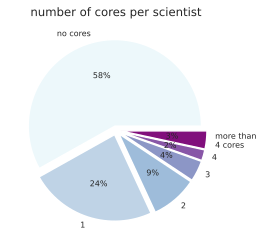

In [15]:
from collections import Counter
import collections
X=collections.OrderedDict(sorted(Counter(num_cores).items()))
Y=[X[x]/sum(X.values()) for x in X.keys()]
Y0=1-len(dictauthcores)/len(dict_auth_to_paper)
data=[Y0]+([x*(1-Y0) for x in Y[0:4]])

data.append(1-np.sum(data[0:5]))
labels = [x for x in range(len(data)-1)]
labels.append('more than\n'+str(len(data)-2)+' cores')
labels[0]='no cores'
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]



label_ff = 20;ff = 20;aa=4;bb=4;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])


#create pie chart
colors=['#edf8fb','#bfd3e6','#9ebcda','#8c96c6','#8856a7','#810f7c']
ax=plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%' ,textprops={'fontsize': 8},explode=[.05 for x in range(len(data))])
plt.title('number of cores per scientist');
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig_CoresPerScientist.pdf',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_CoresPerScientist.png',dpi=300, bbox_inches = "tight")


Among the population, 42% of scientists are part of atleast one core while its rare to have more than 3 cores.

In [16]:
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open(path_career+'dict_authage2023.pkl', 'rb') as f:
    dict_authage2023=pickle.load(f) #author age in 2023
    

path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open(path_career+'dict_workcounts.pkl', 'rb') as f:
    dict_workcounts=pickle.load(f) #author age in 2023

### - who are these scientists with no cores?


- Number of papers of scientists with no cores

40.561611867165915 63.057198655304916


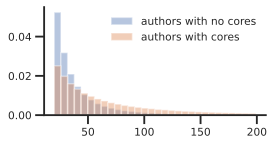

In [639]:
label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
nb=30
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
authzerocores=[auth for auth in dict_auth_to_paper.keys() if auth not in dictauthcores.keys()];
X=np.array([dict_workcounts[x] for x in authzerocores]);X=X[X<200];X=X[X>19]

plt.hist(X,bins=nb,density=True,alpha=.4,label='authors with no cores')

Y=np.array([dict_workcounts[x] for x in dictauthcores.keys()]);Y=Y[Y<200];Y=Y[Y>19]
plt.hist(Y,bins=nb,density=True,alpha=.4,label='authors with cores')
plt.legend(frameon=False,loc='upper right')
sns.despine(ax=ax)

print(np.mean(X),np.mean(Y))
# plt.savefig('teamsfig1.1.svg',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig1.1.pdf',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig1.1.png',dpi=300, bbox_inches = "tight")


# 2. Distribution of coresizes

<ipython-input-17-c7a8dd927431>:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


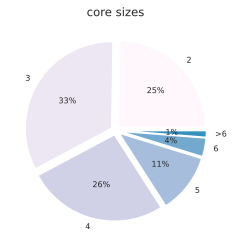

In [17]:
HH=8
X=[significant_cores3[gsize].shape[0] for gsize in range(2,HH)]
Y=[x/sum(X) for x in X]
Y
labels = [x for x in range(2,HH-1)]
labels.append('>'+str(HH-2))
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:7]



label_ff = 20;ff = 20;aa=4;bb=4;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])


#create pie chart
colors=['#fff7fb','#ece7f2','#d0d1e6','#a6bddb','#74a9cf','#3690c0','#0570b0','#045a8d','#023858']
ax=plt.pie(Y, labels = labels, colors = colors, autopct='%.0f%%' ,textprops={'fontsize': 8},explode=[.05 for x in range(len(Y))])
plt.title('core sizes');


plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig_CoreSizeDistribution.pdf',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_CoreSizeDistribution.png',dpi=300, bbox_inches = "tight")


Predominently mode of scientific collaboration tends to be persistent cores of size 3 (comprising 1/3 of the all cores), followed by cores of size 2 and 4 (1/2 each).

FEDE M: do the  
- core and mobility are anti correlated? 
- do "people who have core", "people who have no core" : mobility 
- (instead calculate affiliation diversity, related to mobility, easier)
- homogenity in affiliation of cores 


# 3. Formation of cores

In [255]:
for gsize in range(2,maxS):
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]
    print(round(A.shape[0]/significant_cores3[gsize].shape[0]*100,1))
    
    print(gsize,' team size, % of teams created in one-shot= ',A['is_formed_in_one_shot'].sum()*100/A.shape[0])
#         print(gsize,' team size, % of teams created in one-shot= ',significant_cores3[gsize]['is_formed_in_one_shot'].sum())

79.0
2  team size, % of teams created in one-shot=  100.0
90.7
3  team size, % of teams created in one-shot=  15.597333663336533
57.8
4  team size, % of teams created in one-shot=  4.394669129775021
34.3
5  team size, % of teams created in one-shot=  2.0564073046936318
30.2
6  team size, % of teams created in one-shot=  1.3221267352913402
29.7
7  team size, % of teams created in one-shot=  1.2142471667566108


<ipython-input-1021-da005893047c>:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


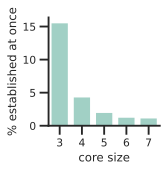

In [1021]:
dfplot = pd.DataFrame()
x=[]
maxS=8
for gsize in range(3,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]
    x.append(A['is_formed_in_one_shot'].sum()*100/A.shape[0])
    
dfplot['gsize']=[gsize for gsize in range(3,maxS)]
dfplot['% cores formed in one-shot']=x
#     dfplot.append(x.T)
aa=2;bb=2;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
ax=sns.barplot(data=dfplot, x="gsize", y="% cores formed in one-shot",color='#99d8c9',errwidth=1.5);
plt.xlabel('core size');plt.ylabel('% established at once');
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig1.pdf',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_FracGrowingTeams.png',dpi=300, bbox_inches = "tight")

## Time taken to form persistent team
from the time of first pairwise meeting of any members

In [260]:
for gsize in range(2,maxS):
    print(gsize,end='\r')
    team_first_time=list(significant_cores3[gsize]['first_paper_pubyear'])

    with open(path_career+'sfirstpubtogether'+str(gsize)+'.pkl', 'rb') as f:
        sfirstpubtogether=pickle.load(f) 
    significant_cores3[gsize]['time_taken_to_accumulatev2']=-np.array([(np.min(np.array(sfirstpubtogether[it]))-team_first_time[it]) for it in range(len(team_first_time))])

In [263]:
t=[]
for gsize in range(3,maxS):
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]
    A=A[A['is_formed_in_one_shot']==False]
    print(gsize,'----Time taken to form persistent team= ',np.mean(A['time_taken_to_accumulatev2']))
    t.append(np.mean(A['time_taken_to_accumulatev2']))
print('FROM THE TIME OF FIRST JOINT PUBLICATION BY ANY PAIR OF MEMBERS')

3 ----Time taken to form persistent team=  5.4178898685571415
4 ----Time taken to form persistent team=  7.6131872209455596
5 ----Time taken to form persistent team=  9.305077225130894
6 ----Time taken to form persistent team=  10.475015790984786
7 ----Time taken to form persistent team=  11.509922152417376
FROM THE TIME OF FIRST JOINT PUBLICATION BY ANY PAIR OF MEMBERS


In [264]:
t=np.array(t)
t[1:-1]-t[0:-2]

array([2.19529735, 1.69189   , 1.16993857])

<ipython-input-1017-2e45c4add763>:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


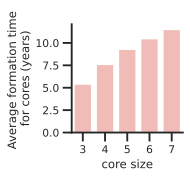

In [1017]:
dfplot = pd.DataFrame()
x=[]
for gsize in range(3,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]

    A=A[A['is_formed_in_one_shot']==False]    
    x.append(np.mean(A['time_taken_to_accumulatev2']))
dfplot['gsize']=[gsize for gsize in range(3,maxS)]
dfplot['Average formation time for cores (years)']=x

fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
# sns.boxplot(data=dfplot.dropna(), x="size", y="core_diversity",showfliers=False);
sns.barplot(data=dfplot, x="gsize", y="Average formation time for cores (years)",color='#fbb4ae',errwidth=1.5);
plt.xlabel('core size');plt.ylabel('Average formation time \nfor cores (years)');
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_FormationTime.png',dpi=300, bbox_inches = "tight")

## Impact of first paper by a) one shot assembled, b) teams the grow


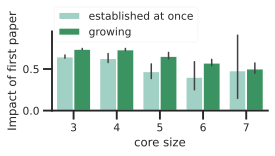

In [1020]:
x=[];y=[];
dfplot = pd.DataFrame()

for gsize in range(3,maxS):
    print(gsize,end='\r')


    A= pd.DataFrame()
    a=significant_cores3[gsize][significant_cores3[gsize]['is_formed_in_one_shot']==True]
    a=a[a['w']>=5]
    a=a[a['persistance_time']>=1]
    A['c5 first paper']=a['c5_first']
    A['gsize']=gsize
    A['']='established at once'
    dfplot=pd.concat([dfplot,A])
    
    A= pd.DataFrame()
    b=significant_cores3[gsize][significant_cores3[gsize]['is_formed_in_one_shot']==False]
    b=b[b['w']>=5]
    b=b[b['persistance_time']>=1]
    A['c5 first paper']=b['c5_first']
    A['gsize']=gsize
    A['']='growing'
    dfplot=pd.concat([dfplot,A])
    

aa=4;bb=2;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])

# sns.boxplot(data=dfplot.dropna(), x="size", y="core_diversity",showfliers=False);
pal=['#99d8c9','#2ca25f']
ax=sns.barplot(data=dfplot, x="gsize", y="c5 first paper",hue='',errwidth=1.5,palette=pal);
# plt.xlabel('core size');plt.ylabel('Average formation time \nfor cores (years)');
sns.despine(ax=ax)
plt.tight_layout()
# plt.legend(frameon=True,loc='lower right',framealpha=0.5)
plt.legend(bbox_to_anchor=(.7, .8), title='',framealpha=.1)

# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.xlabel('core size');plt.ylabel('Impact of first paper');
plt.savefig('teamsfig_GrowingAndImpact.png',dpi=300, bbox_inches = "tight")

growing teams, might consist on average of older members cmpared to instantly fromed teams.


CONFIRM. If so, possibe reason for this. 

<ipython-input-878-96ab9b8e4215>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


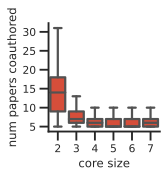

In [878]:
from scipy import stats
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]

    Y=np.array(A['w'])
    X=np.array(A['size'])

    
    x=pd.DataFrame();    x['number of coauthored papers']=Y;    x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])


label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
ax=sns.boxplot(data=dfplot2, x="gsize", y="number of coauthored papers",color='#f03b20',showfliers=False);

plt.yticks([5,10,15,20,25,30])
plt.xlabel('core size');plt.ylabel('num papers coauthored');
sns.despine(ax=ax)

plt.tight_layout()

# plt.savefig('teamsfig_numpapers(W).svg',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_numpapers(W).png',dpi=300, bbox_inches = "tight")


In [587]:
x=pd.DataFrame();    
x['frac_young']=[np.mean(A['frac_young'])];
x['frac_midage']=[np.mean(A['frac_midage'])];   
x.set_['gsize']=[gsize];
x


,frac_young,frac_midage,gsize
0,0.209313,0.167528,7


In [584]:
np.mean(A['frac_young'])

0.20931308303137763

## Career ages at time of core formation

<ipython-input-1031-2d11b0d4b1b7>:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


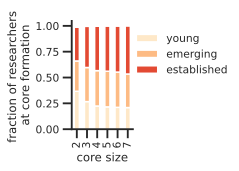

In [1031]:
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]
#     x=pd.DataFrame();    x['fy']=np.array(A['frac_young']);x['fm']=np.array(A['frac_midage']);    x['gsize']=gsize;
    x=pd.DataFrame();    x['young']=[np.mean(A['frac_young'])];
    x['emerging']=[np.mean(A['frac_midage'])];x['established']=[np.mean(A['frac_oldage'])];   x.index=[gsize];
    dfplot2=pd.concat([dfplot2,x])
df_ageatformation=dfplot2.copy()
label_ff = 20;ff = 20;aa=1.1;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
# ax=sns.boxplot(data=dfplot2, x="gsize", y="fy",color='#f03b20',showfliers=False);
# ax=sns.barplot(data=dfplot2, x="gsize", y="fy",color='#f03b20');
ax=dfplot2.plot(ax=ax,kind='bar', stacked=True, color=['#fee8c8','#fdbb84','#e34a33'])

plt.xlabel('core size');plt.ylabel('fraction of researchers \nat core formation');
sns.despine(ax=ax)
plt.legend(bbox_to_anchor=(.9, .97), title='',framealpha=.0)

plt.tight_layout()


# plt.savefig('teamsfig_ScientistsAgeAtCoreFormation.svg',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_ScientistsAgeAtCoreFormation.png',dpi=300, bbox_inches = "tight")


In [622]:
round(df_ageatformation*100,1)

,young,emerging,established
2,36.7,29.3,32.6
3,26.7,33.0,39.8
4,22.4,34.2,42.9
5,21.6,34.5,43.6
6,21.2,34.1,44.4
7,20.9,32.5,46.4


# 4. Exclusivity
fraction of papers by members as part of team/ total combined number of papers by all member
during time of core together - from first pub to last pub together.


In [881]:
frac_part_of_core=[]
dfplot2=pd.DataFrame();
for  gsize in range(2,maxS):
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]    
    A=A[A['work_counts_UNION']>0]
    A=A[A['exclusivity']<=1]

    
    x=pd.DataFrame();    x['exclusivity']=np.array(A['w']/A['work_counts_UNION']);    x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
    
#     print(A.shape[0]/significant_cores3[gsize].shape[0])
    print(gsize,'----',round(np.mean(A['w']/A['work_counts_UNION']),2))
    frac_part_of_core.append(np.mean(A['w']/A['work_counts_UNION']))
    

2 ---- 0.31
3 ---- 0.29
4 ---- 0.29
5 ---- 0.32
6 ---- 0.35
7 ---- 0.38


<ipython-input-884-a4e793e8529b>:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


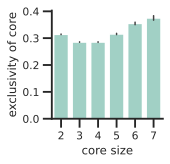

In [884]:
dfplot = pd.DataFrame()
x=[]
dfplot['gsize']=[gsize for gsize in range(2,maxS)]
dfplot['exclusivity of core']=frac_part_of_core
#     dfplot.append(x.T)

label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
# ax=sns.boxplot(data=dfplot2, x="gsize", y="exclusivity",showfliers=False,color='#99d8c9');
ax=sns.barplot(data=dfplot2, x="gsize", y="exclusivity",color='#99d8c9',errwidth=1.5);
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.xlabel('core size');plt.ylabel('exclusivity of core');
plt.savefig('teamsfig_Exclusivity.png',dpi=300, bbox_inches = "tight")


Exclusivity increases with coresize, only highly exclusive teams can support larger core sizes. Being part of a bigger core seems to require personal investment, reducing the percentage of non-core collaborations.

This can be explained by the fact that most cores grow slowly over years (3 year per new memmber addition) instead of being formed instantly, thus, the core publishes more papers together over the years.

In [284]:
np.mean(frac_part_of_core)


0.37946400472112946

- On average, 38.0 % of teams individual work is published with the persistent core.

### Exclusivity vs Impact

- Exclusivity provides gradient in impact given a core size, refinement of dashun's message.


In [136]:
from scipy import stats
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    
    A=significant_cores3[gsize]
    A=A[A['w2018']>=5]
    A=A[A['persistance_time']>=1]    
    A=A[A['work_counts_UNION']>0]
    A=A[A['exclusivity']<=1]

    Y=np.array(A['exclusivity'])
    X=np.array(A['c5_av'])

    Z=sorted(X); p90=Z[int(round(len(Z)*.9,0))];p10=Z[int(round(len(Z)*.1,0))]; 
    ind90=np.where(X>=p90)[0];ind10=np.where(X<=p10)[0];
    x90=X[ind90];x10=X[ind10];
    y90=Y[ind90];y10=Y[ind10];
    
    x=pd.DataFrame();    x['c5']=y90;    x['exclusivity']='top 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
    x=pd.DataFrame();  x['c5']=y10;    x['exclusivity']='bottom 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
#     x=pd.DataFrame();  x['exclusivity']=y10;    x['c5']='bottom 20%';x['gsize']=gsize;
#     dfplot2=pd.concat([dfplot2,x])

    res1 = stats.spearmanr(X,Y)
#     res2 = stats.spearmanr(x10,y10)
    print(gsize, res1)


label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

ax=sns.barplot(data=dfplot2, x="gsize", y="c5",hue='exclusivity',errwidth=1.5,palette=['#f6eff7','#bdc9e1']);

sns.despine(ax=ax)
plt.xlabel('core size');plt.ylabel('avg impact');
# plt.legend(framealpha=0.5)
plt.legend(bbox_to_anchor=(.51, .53), title='exclusivity',framealpha=.8)

# plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_ExclusivityAndImpact.png',dpi=300, bbox_inches = "tight")


KeyError: 'w2018'

# 5. Diversity of papers by cores

<ipython-input-886-bebcf528d751>:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


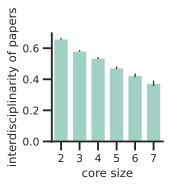

In [886]:
dfplot=pd.DataFrame()
icd=np.where(significant_cores3[gsize].columns=='core_diversity')[0][0]
isize=np.where(significant_cores3[gsize].columns=='size')[0][0]
for gsize in range(2,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]       
    A=A.iloc[:,[isize,icd]]
    
    dfplot=pd.concat([dfplot ,A])

label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

ax=sns.barplot(data=dfplot.dropna(), x="size", y="core_diversity",color='#99d8c9',errwidth=1.5);

sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.xlabel('core size');plt.ylabel('interdisciplinarity of papers');
# plt.savefig('teamsfig8.png',dpi=300, bbox_inches = "tight")


# 4.5 Impact

## Average impact

<ipython-input-887-9760f141ca9d>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


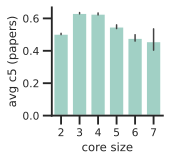

In [887]:
dfplot=pd.DataFrame()
icd=np.where(significant_cores3[gsize].columns=='core_diversity')[0][0]
isize=np.where(significant_cores3[gsize].columns=='size')[0][0]
i1=np.where(significant_cores3[gsize].columns=='c5_av')[0][0]
for gsize in range(2,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]   
    dfplot=pd.concat([dfplot ,A.iloc[:,[i1,isize,icd]]])

meanlineprops = dict(linestyle='--', linewidth=1.5, color='k')
medianprops = dict(linestyle='--', linewidth=1.5, color='white')

# sns.boxplot(data=dfplot.dropna(), x="size", y="c5_av",showfliers=False,showmeans=True,meanline=True,meanprops=meanlineprops,medianprops=medianprops);




label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

ax=sns.barplot(data=dfplot.dropna(), x="size", y="c5_av",color='#99d8c9',errwidth=1.5);

sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.xlabel('core size');plt.ylabel('avg c5 (papers)')
plt.savefig('teamsfig_Impact.png',dpi=300, bbox_inches = "tight")


why less c5 for bigger cores?
in general bigger teams are known to get more impact, so why a falling trend for higher core size?
perhaps big teams which get more impact are the non-persistent ones?


 - EXCLUSIVITY procvides gradient?-- Refinement of dashun's message


## Impact vs Career

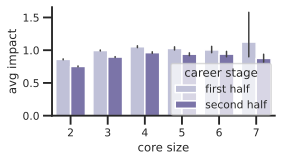

In [889]:
dfplot2=pd.DataFrame()
min_impact=0.1
for gsize in range(2,maxS):
    print(gsize,end='\r')
    
    A=significant_cores3[gsize]
    A=A[A['w2018']>=5]
    A=A[A['persistance_time']>=1]    
    A=A[A['c5_half1']>min_impact]    
    A=A[A['c5_half2']>min_impact]  

    x=pd.DataFrame();    x['c5']=np.array(A['c5_half1']);    x['career stage']='first half';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
    x=pd.DataFrame();    x['c5']=np.array(A['c5_half2']);    x['career stage']='second half';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])


label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
pal=['#bcbddc','#756bb1']
ax=sns.barplot(data=dfplot2, x="gsize", y="c5",hue='career stage',palette=pal,errwidth=1.5);
#efedf5
sns.despine(ax=ax)
plt.xlabel('core size');plt.ylabel('avg impact');
# plt.legend(framealpha=0.5)
plt.legend(bbox_to_anchor=(.51, .53), title='career stage',framealpha=.7);

# plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig_ImpactAndCareer.png',dpi=300, bbox_inches = "tight")


In [822]:
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize)
    
    A=significant_cores3[gsize]
    A=A[A['w2018']>=5]
    A=A[A['persistance_time']>=1]    
    A=A[A['c5_half1']>min_impact]    
    A=A[A['c5_half2']>min_impact]    
    A['c5 ratio']=np.divide(np.array(A['c5_half1']),np.array(A['c5_half2']))
    print('% cores with higher impact in first half= ',round(100* A[A['c5 ratio']>1].shape[0]/A.shape[0],1))
#     x=pd.DataFrame();    x['c5 ratio']=np.divide(np.array(A['c5_half1']),np.array(A['c5_half2']));    x['career stage']='first half';x['gsize']=gsize;
    
#     dfplot2=pd.concat([dfplot2,x])


# label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
# fig = plt.figure(figsize=(aa, bb));
# spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
# ax = fig.add_subplot(spec[0])
# pal=['#bcbddc','#756bb1']
# ax=sns.barplot(data=dfplot2, x="gsize", y="c5 ratio",color=pal[1]);
# #efedf5
# sns.despine(ax=ax)
# plt.xlabel('core size');plt.ylabel(r'$\frac{impact \ first \ half}{impact\ second\ half}$');
# # plt.legend(framealpha=0.5)
# plt.legend(bbox_to_anchor=(.51, .53), title='career stage',framealpha=.4)

# plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig_ImpactAndCareer.png',dpi=300, bbox_inches = "tight")


2
% cores with higher impact in first half=  56.8
3
% cores with higher impact in first half=  55.7
4
% cores with higher impact in first half=  54.9
5
% cores with higher impact in first half=  54.8
6
% cores with higher impact in first half=  52.2
7
% cores with higher impact in first half=  54.2


## Gallo: Given core size, find effect of team size on impact. 
- Should be growing in general (DASHUN)
- Find optimum coresize given core size.
- Make dictionary --  

In [444]:
with open(path_career+'dict_c5_norm.pkl', 'rb') as f:
    dict_c5_norm=pickle.load(f) 
    
with open(path_career+'dict_papersteamsizes.pkl', 'rb') as f:
    dict_papersteamsizes=pickle.load(f) 

In [448]:
# c5_all=np.array(list(dict_c5_norm.values()))
# teamsizes_all=np.array([dict_papersteamsizes.get(x,np.nan) for x in dict_c5_norm.keys()])



In [453]:
X=c5_all[~np.isnan(teamsizes_all)]
Y=teamsizes_all[~np.isnan(teamsizes_all)]

SpearmanrResult(correlation=0.1374610325423471, pvalue=0.0)


In [455]:
ind=np.where(X>0)
print(stats.spearmanr(X[ind],Y[ind]))

SpearmanrResult(correlation=0.1374610325423471, pvalue=0.0)


In [570]:
with open(path_career+'corrimpactteamsize.pkl', 'rb') as f:
    corrimpactteamsize=pickle.load(f) 
with open(path_career+'corrimpactteamsizenumpapers.pkl', 'rb') as f:
    numpapers=pickle.load(f) 

for gsize in range(2,maxS):
    t_ic = time.time();
    print(gsize,end='\r')


In [571]:
corrimpactteamsize={}
numpapers={}

for gsize in range(2,maxS):
    t_ic = time.time();
    print(gsize)
    corrimpactteamsize[gsize]=[]
    numpapers[gsize]=[]
    with open(path_career+'significant_cores(c5norm)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        c5=pickle.load(f) 
    with open(path_career+'significant_cores(teamsizes)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        teamsizes=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
        
    print(stats.spearmanr(c5,teamsizes))
    c5=np.array(c5)
    teamsizes=np.array(teamsizes)
    ind=np.where(c5>0)
    print(stats.spearmanr(c5[ind],teamsizes[ind]))
        



2
SpearmanrResult(correlation=0.19520801523779224, pvalue=0.0)
SpearmanrResult(correlation=0.1053207551249555, pvalue=0.0)
3
SpearmanrResult(correlation=0.16425026964004205, pvalue=0.0)
SpearmanrResult(correlation=0.09947887974735246, pvalue=0.0)
4
SpearmanrResult(correlation=0.14286885297458177, pvalue=0.0)
SpearmanrResult(correlation=0.09291392208360238, pvalue=0.0)
5
SpearmanrResult(correlation=0.10938912317061349, pvalue=0.0)
SpearmanrResult(correlation=0.07453823808560985, pvalue=3.93342772484914e-309)
6
SpearmanrResult(correlation=0.0933699480865199, pvalue=0.0)
SpearmanrResult(correlation=0.049731205406561306, pvalue=3.408128757393853e-39)
7
SpearmanrResult(correlation=0.1104196560840934, pvalue=9.602750984487162e-175)
SpearmanrResult(correlation=0.04526692779948863, pvalue=5.71578856942957e-12)


In [572]:
gsize=2
X=np.array(numpapers[gsize])
Y=np.array(corrimpactteamsize[gsize])
c=np.array([x[0] for x in Y])
p=np.array([x[0] for x in Y])

Yc
ind=np.where((X>20)&(p<.01))


(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

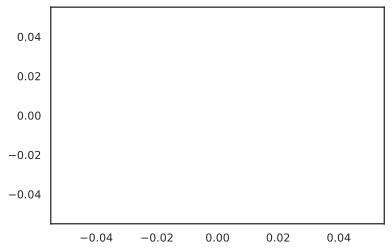

In [573]:
plt.hist(c[ind],density=True)

In [ ]:
# from scipy import stats
# dfplot2=pd.DataFrame()
# for gsize in range(2,maxS):
#     print(gsize,end='\r')
#     A=significant_cores3[gsize]
# #     A=A.dropna()
#     X=np.array(A['core_diversity'])
#     Y=np.array(A['c5_av'])

#     Z=sorted(X); p90=Z[int(round(len(Z)*.1,0))];p10=Z[int(round(len(Z)*.1,0))]; 
#     ind90=np.where(X>=p90)[0];ind10=np.where(X<=p10)[0];
#     x90=X[ind90];x10=X[ind10];
#     y90=Y[ind90];y10=Y[ind10];
    
#     x=pd.DataFrame();    x['c5']=y90;    x['interdisciplinarity']='top 10%';x['gsize']=gsize;
#     dfplot2=pd.concat([dfplot2,x])
#     x=pd.DataFrame();  x['c5']=y10;    x['interdisciplinarity']='bottom 10%';x['gsize']=gsize;
#     dfplot2=pd.concat([dfplot2,x])

# #     res1 = stats.spearmanr(x90,y90)
# #     res2 = stats.spearmanr(x10,y10)
# #     print(gsize, res1,res2)


In [ ]:

# label_ff = 20;ff = 20;aa=6;bb=4;wspace_=.5;hspace_=.3;
# fig = plt.figure(figsize=(aa, bb));
# spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
# ax = fig.add_subplot(spec[0])
# 
# ax=sns.barplot(data=dfplot2, x="gsize", y="c5",hue='interdisciplinarity');

# sns.despine(ax=ax)
# plt.tight_layout()
# # plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.xlabel('core size');plt.ylabel('c5 of first paper by core (normalized)')
# plt.savefig('teamsfig8.pdf',dpi=300, bbox_inches = "tight")


## Fede B : Filter on success, c5 top 30 percent; top 10 percent 


<ipython-input-907-8ed3071e8ca3>:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


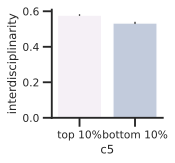

In [907]:
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]    
    Y=np.array(A['core_diversity'])
    X=np.array(A['c5_av'])

    Z=sorted(X); p90=Z[int(round(len(Z)*.1,0))];p10=Z[int(round(len(Z)*.1,0))]; 
    ind90=np.where(X>=p90)[0];ind10=np.where(X<=p10)[0];
    x90=X[ind90];x10=X[ind10];
    y90=Y[ind90];y10=Y[ind10];
    
    x=pd.DataFrame();    x['interdisciplinarity']=y90;    x['c5']='top 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
    x=pd.DataFrame();  x['interdisciplinarity']=y10;    x['c5']='bottom 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])

#     res1 = stats.spearmanr(x90,y90)
#     res2 = stats.spearmanr(x10,y10)
#     print(gsize, res1,res2)



label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

# ax=sns.barplot(data=dfplot2, x="gsize", y="interdisciplinarity",hue='c5',errwidth=1.5,palette=['#f6eff7','#bdc9e1']);
ax=sns.barplot(data=dfplot2,  y="interdisciplinarity",x='c5',errwidth=1.5,palette=['#f6eff7','#bdc9e1']);

sns.despine(ax=ax)
# plt.xlabel('core size');plt.ylabel('interdisciplinarity of papers')
# plt.legend(bbox_to_anchor=(.55, .5), title='impact',framealpha=.1)

plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_InterdisciAndImpact.pdf',dpi=300, bbox_inches = "tight")


## Fede M: Displine wise analysis of exclusivity: Anthropology, Applied physics (big experminents, more human resource)

# 6. Non core members

<ipython-input-957-906f7cffd483>:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


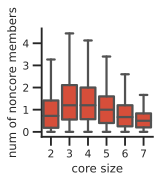

In [957]:
x=[]
y=[]
y_err=[]
ci=[]
dfplot=pd.DataFrame();   
for gsize in range(2,maxS):
    nNonCor=[]
    with open(path_career+'significant_cores(num_noncore)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        num_noncore=pickle.load(f)
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    for n in range(len(I)-1):
        nNonCor.append(np.mean(num_noncore[I[n]:I[n+1]]))
        frac_onlycore.append(np.mean(np.array(num_noncore[I[n]:I[n+1]])==0))
    nNonCor=np.array(nNonCor)
    frac_onlycore=np.array(frac_onlycore)
    A=significant_cores3[gsize]
    ind=np.where((A['w']>=5)&(A['persistance_time']>=1))[0]
    nNonCor=nNonCor[ind]
    frac_onlycore=frac_onlycore[ind]
    
    
    x=pd.DataFrame();    x['nnc']=nNonCor;    x['gsize']=gsize;
    dfplot=pd.concat([dfplot,x])
    
#     print(np.mean(nNonCor))
    print(gsize,end='\r')
#     X=pd.DataFrame()
#     x.append(gsize)
#     y.append(np.mean(nNonCor))
#     y_err.append(np.var(nNonCor)**.5/len(nNonCor)**.5)
#     df_
   
#     ci.append(1.96 * np.std(nNonCor)/np.sqrt(len(nNonCor)))

# x=np.array(x);y=np.array(y);ci=np.array(ci)

label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

ax=sns.boxplot(data=dfplot, x="gsize", y="nnc",color='#f03b20',showfliers=False);
# ax.errorbar(x,y,y_err ,'-o',ls='-.', mfc='w',mec='w', ms=0,lw=2, mew=2,color='#beaed4',ecolor='#beaed4',alpha=.8)
# ax.plot(x,y ,'-o',  ms=2,lw=2, mew=2,color='#beaed4',alpha=.8)
# ax.plot(x,y)
# ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

sns.despine(ax=ax)
plt.tight_layout()
# ax.set_xticks(range(2,maxS))
ax.set_yticks([0,1,2,3,4])
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.xlabel('core size');plt.ylabel('num of noncore members')
plt.savefig('teamsfig_numbernoncore.png',dpi=300, bbox_inches = "tight")

## % papers solely with core members *no externals

<ipython-input-961-22a0d59d57ab>:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


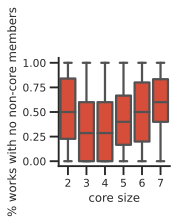

In [961]:
x=[]
y=[]
y_err=[]
ci=[]
dfplot=pd.DataFrame();   
for gsize in range(2,maxS):
    nNonCor=[]
    frac_onlycore=[]
    with open(path_career+'significant_cores(num_noncore)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        num_noncore=pickle.load(f)
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    for n in range(len(I)-1):
        nNonCor.append(np.mean(num_noncore[I[n]:I[n+1]]))
        frac_onlycore.append(np.mean(np.array(num_noncore[I[n]:I[n+1]])==0))
    nNonCor=np.array(nNonCor)
    frac_onlycore=np.array(frac_onlycore)
    A=significant_cores3[gsize]
    ind=np.where((A['w']>=5)&(A['persistance_time']>=1))[0]
    nNonCor=nNonCor[ind]
    frac_onlycore=frac_onlycore[ind]
    
    
    x=pd.DataFrame();    x['frac_onlycore']=frac_onlycore;    x['gsize']=gsize;
    dfplot=pd.concat([dfplot,x])
    
#     print(np.mean(nNonCor))
    print(gsize,end='\r')
#     X=pd.DataFrame()
#     x.append(gsize)
#     y.append(np.mean(nNonCor))
#     y_err.append(np.var(nNonCor)**.5/len(nNonCor)**.5)
#     df_
   
#     ci.append(1.96 * np.std(nNonCor)/np.sqrt(len(nNonCor)))

# x=np.array(x);y=np.array(y);ci=np.array(ci)



<ipython-input-971-d6d9fdd47391>:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


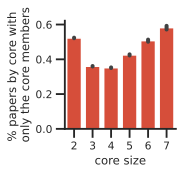

In [971]:


label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

ax=sns.barplot(data=dfplot, x="gsize", y="frac_onlycore",color='#f03b20');
# ax.errorbar(x,y,y_err ,'-o',ls='-.', mfc='w',mec='w', ms=0,lw=2, mew=2,color='#beaed4',ecolor='#beaed4',alpha=.8)
# ax.plot(x,y ,'-o',  ms=2,lw=2, mew=2,color='#beaed4',alpha=.8)
# ax.plot(x,y)
# ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

sns.despine(ax=ax)
plt.tight_layout()
# ax.set_xticks(range(2,maxS))
# ax.set_yticks([0,1,2,3,4])
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.xlabel('core size');plt.ylabel('% papers by core with \nonly the core members')
plt.savefig('teamsfig_FracPapersNoNoncore.png',dpi=300, bbox_inches = "tight")

## Percentages of num_core members

In [47]:

from collections import Counter
import collections
Y0=[]
for gsize in range(2,maxS):
    print(gsize)
    with open(path_career+'significant_cores(num_noncore)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        num_noncore=pickle.load(f)
    print(np.mean(num_noncore))
    print(gsize,end='\r')

    X=collections.OrderedDict(sorted(Counter(num_noncore).items()))
    Y={x:round(100*X[x]/sum(X.values()),1) for x in X.keys()}
    print(Y)
    Y0.append(Y[0])

2
0.8518307520747852
{0: 55.3, 1: 23.4, 2: 11.1, 3: 5.3, 4: 2.6, 5: 1.3, 6: 0.7, 7: 0.4}
3
1.2047351481307642
{0: 43.1, 1: 24.7, 2: 14.9, 3: 8.5, 4: 4.7, 5: 2.7, 6: 1.4}
4
1.4006176420240528
{0: 35.7, 1: 25.0, 2: 17.4, 3: 11.1, 4: 7.0, 5: 3.8}
5
1.1817391525288383
{0: 39.6, 1: 25.9, 2: 17.5, 3: 10.9, 4: 6.1}
6
0.8630235917188253
{0: 48.8, 1: 25.6, 2: 16.1, 3: 9.5}
7
0.567701978470045
{0: 58.5, 1: 26.2, 2: 15.3}


In [49]:
round(np.mean(Y0),1)

46.8

Across coresizes, on average  46.8 % of papers by cores are written exclusively by the core with no additional members. Moreover, 35-40 % of papers have 1-2 non-core members, and less than 20 % of papers have more than 2.


## ages of noncore members

<ipython-input-1030-ca1ac6fe193e>:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


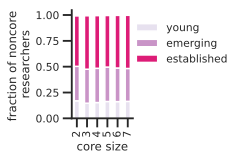

In [1030]:
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]
#     x=pd.DataFrame();    x['fy']=np.array(A['frac_young']);x['fm']=np.array(A['frac_midage']);    x['gsize']=gsize;
    x=pd.DataFrame();    
    x['young']=[np.mean(A['noncore_frac_young'])];
    x['emerging']=[np.mean(A['noncore_frac_midage'])];
    x['established']=[np.mean(A['noncore_frac_oldage'])];   
    x.index=[gsize];
    dfplot2=pd.concat([dfplot2,x])
df_ageatformation=dfplot2.copy()
label_ff = 20;ff = 20;aa=1.1;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
# ax=sns.boxplot(data=dfplot2, x="gsize", y="fy",color='#f03b20',showfliers=False);
# ax=sns.barplot(data=dfplot2, x="gsize", y="fy",color='#f03b20');
ax=dfplot2.plot(ax=ax,kind='bar', stacked=True, color=['#e7e1ef','#c994c7','#dd1c77'])

plt.xlabel('core size');plt.ylabel('fraction of noncore \nresearchers');
sns.despine(ax=ax)
plt.legend(bbox_to_anchor=(.9, .97), title='',framealpha=.0)

plt.tight_layout()

# plt.savefig('teamsfig_ScientistsAgeAtCoreFormation.svg',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_NoncoreScientistsAges.png',dpi=300, bbox_inches = "tight")


In [1008]:
significant_cores3[gsize]

,group,pvalue,w,fdr,ni,N,size,first_paper_pubyear,last_paper_pubyear,is_formed_in_one_shot,...,c5_av,core_diversity,time_taken_to_accumulatev2,frac_young,frac_mid,frac_midage,frac_oldage,w2018,c5_half1,c5_half2
83,"(https://openalex.org/A245542119, https://open...",3.209989e-27,7,True,"(25, 21, 65)",7841,3,2006.003,2011.003,False,...,0.000000,0.471479,8.000,0.000000,0.333333,0.666667,0.333333,7,0.000000,0.000000
97,"(https://openalex.org/A4332494910, https://ope...",5.472489e-34,9,True,"(62, 83, 231)",37714,3,1989.003,1998.264,False,...,0.112201,0.749997,6.667,0.000000,0.333333,0.333333,0.666667,9,0.201962,0.000000
130,"(https://openalex.org/A2024242063, https://ope...",5.196571e-24,7,True,"(81, 47, 36)",9269,3,2001.003,2002.003,False,...,0.000000,0.420153,1.000,0.333333,0.000000,0.000000,0.666667,7,0.000000,0.000000
134,"(https://openalex.org/A1971919205, https://ope...",6.310978e-31,8,True,"(27, 26, 28)",5575,3,2015.669,2021.506,False,...,1.001696,0.762995,3.369,0.333333,0.333333,0.333333,0.333333,6,0.697479,0.805064
200,"(https://openalex.org/A4330962171, https://ope...",2.659503e-30,13,True,"(158, 56, 60)",4193,3,1973.694,1977.681,False,...,0.000000,0.076765,6.458,0.333333,0.333333,0.333333,0.333333,13,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94667473,"(https://openalex.org/A2113526355, https://ope...",3.781987e-27,8,True,"(205, 96, 83)",29514,3,2009.003,2014.003,False,...,0.000000,0.688887,7.514,0.000000,0.000000,0.000000,1.000000,8,0.000000,0.000000
94690201,"(https://openalex.org/A1520836410, https://ope...",0.000000e+00,4,True,"(64, 23, 159)",10236,3,2002.003,2002.003,False,...,0.000000,0.166361,4.000,0.333333,0.000000,0.333333,0.333333,4,0.000000,0.000000
94754161,"(https://openalex.org/A2003692920, https://ope...",0.000000e+00,5,True,"(117, 28, 80)",9235,3,2000.003,2006.003,False,...,0.000000,0.000000,8.000,0.000000,0.666667,0.666667,0.333333,5,0.000000,0.000000
94841661,"(https://openalex.org/A2150039061, https://ope...",5.282031e-23,6,True,"(37, 230, 35)",22661,3,2011.311,2012.239,False,...,0.000000,0.620561,2.308,0.333333,0.333333,0.333333,0.333333,6,0.000000,0.000000


# 7. Literature Search

<AxesSubplot:>

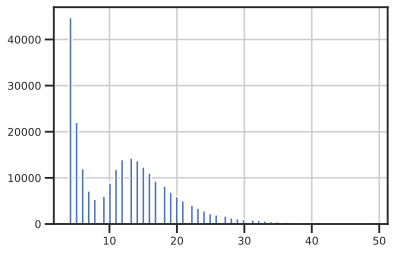

In [511]:
gsize=2
significant_cores3[gsize][significant_cores3[gsize]['w']<50]['w'].hist(bins=100)

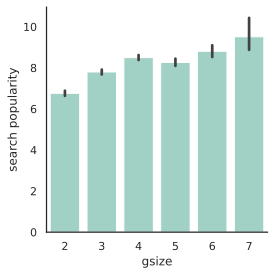

In [100]:
dfplot = pd.DataFrame()

for gsize in range(2,maxS):
    print(gsize,end='\r')

    A= pd.DataFrame()
    A['search popularity']=significant_cores3[gsize]['corelitP']
    A['gsize']=gsize
#     A['']='instantly formed'
    dfplot=pd.concat([dfplot,A])
aa=4;bb=4;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])

# sns.boxplot(data=dfplot.dropna(), x="size", y="core_diversity",showfliers=False);
ax=sns.barplot(data=dfplot, x="gsize", y="search popularity",color='#99d8c9',errwidth=1.5);
# plt.xlabel('core size');plt.ylabel('Average formation time \nfor cores (years)');
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig5.png',dpi=300, bbox_inches = "tight")

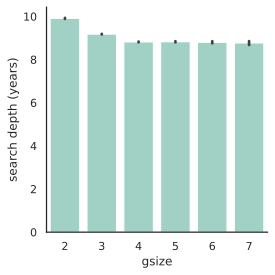

In [94]:
dfplot = pd.DataFrame()

for gsize in range(2,maxS):
    print(gsize,end='\r')

    A= pd.DataFrame()
    a=corelitD[gsize]
    A['search depth (years)']=a
    A['gsize']=gsize
#     A['']='instantly formed'
    dfplot=pd.concat([dfplot,A])
aa=4;bb=4;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])

# sns.boxplot(data=dfplot.dropna(), x="size", y="core_diversity",showfliers=False);
ax=sns.barplot(data=dfplot, x="gsize", y="search depth (years)",color='#99d8c9',errwidth=1.5);
# plt.xlabel('core size');plt.ylabel('Average formation time \nfor cores (years)');
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig5.png',dpi=300, bbox_inches = "tight")

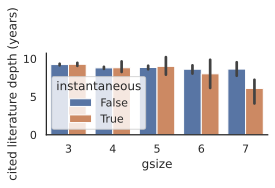

In [77]:
x=[];y=[];
dfplot = pd.DataFrame()

for gsize in range(3,maxS):
    print(gsize,end='\r')

    A= pd.DataFrame()
    a=corelitD[gsize]
    A['cited literature depth (years)']=a
    A['gsize']=gsize
    A['instantaneous']=significant_cores3[gsize]['is_formed_in_one_shot']
    dfplot=pd.concat([dfplot,A])

aa=4;bb=2;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])

# sns.boxplot(data=dfplot.dropna(), x="size", y="core_diversity",showfliers=False);
ax=sns.barplot(data=dfplot, x="gsize", y="cited literature depth (years)",hue='instantaneous');
# plt.xlabel('core size');plt.ylabel('Average formation time \nfor cores (years)');
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig5.png',dpi=300, bbox_inches = "tight")

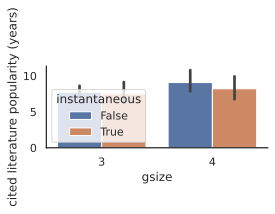

In [79]:
x=[];y=[];
dfplot = pd.DataFrame()

for gsize in range(3,5):
    print(gsize,end='\r')

    A= pd.DataFrame()
    a=corelitP[gsize]
    A['cited literature popularity (years)']=a
    A['gsize']=gsize
    A['instantaneous']=significant_cores3[gsize]['is_formed_in_one_shot']
    dfplot=pd.concat([dfplot,A])

aa=4;bb=2;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])

# sns.boxplot(data=dfplot.dropna(), x="size", y="core_diversity",showfliers=False);
ax=sns.barplot(data=dfplot, x="gsize", y="cited literature popularity (years)",hue='instantaneous');
# plt.xlabel('core size');plt.ylabel('Average formation time \nfor cores (years)');
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig5.png',dpi=300, bbox_inches = "tight")

2 SpearmanrResult(correlation=nan, pvalue=nan)
3 SpearmanrResult(correlation=nan, pvalue=nan)
4 SpearmanrResult(correlation=nan, pvalue=nan)
5 SpearmanrResult(correlation=nan, pvalue=nan)
6 SpearmanrResult(correlation=nan, pvalue=nan)
7 SpearmanrResult(correlation=nan, pvalue=nan)


<ipython-input-88-3fec9673d45d>:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


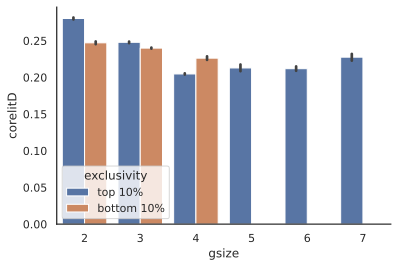

In [88]:
from scipy import stats
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    
    A=significant_cores3[gsize]
#     A=A.dropna()
    A=A[A['work_counts_UNION']>10]

    Y=np.array(A['exclusivity'])
    X=np.array(A['corelitD'])

    Z=sorted(X); p90=Z[int(round(len(Z)*.9,0))];p10=Z[int(round(len(Z)*.1,0))]; 
    ind90=np.where(X>=p90)[0];ind10=np.where(X<=p10)[0];
    x90=X[ind90];x10=X[ind10];
    y90=Y[ind90];y10=Y[ind10];
    
    x=pd.DataFrame();    x['corelitD']=y90;    x['exclusivity']='top 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
    x=pd.DataFrame();  x['corelitD']=y10;    x['exclusivity']='bottom 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
#     x=pd.DataFrame();  x['exclusivity']=y10;    x['c5']='bottom 20%';x['gsize']=gsize;
#     dfplot2=pd.concat([dfplot2,x])

    res1 = stats.spearmanr(X,Y)
#     res2 = stats.spearmanr(x10,y10)
    print(gsize, res1)


label_ff = 20;ff = 20;aa=6;bb=4;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

ax=sns.barplot(data=dfplot2.dropna(), x="gsize", y="corelitD",hue='exclusivity');

sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig7.png',dpi=300, bbox_inches = "tight")


2 SpearmanrResult(correlation=nan, pvalue=nan)
3 SpearmanrResult(correlation=nan, pvalue=nan)
4 SpearmanrResult(correlation=nan, pvalue=nan)
5 SpearmanrResult(correlation=nan, pvalue=nan)
6 SpearmanrResult(correlation=nan, pvalue=nan)
7 SpearmanrResult(correlation=nan, pvalue=nan)


<ipython-input-90-94107885ada1>:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


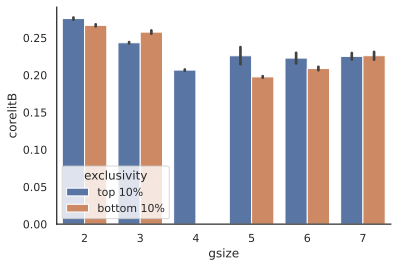

In [90]:
from scipy import stats
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    
    A=significant_cores3[gsize]
    A=A[A['work_counts_UNION']>10]
    Y=np.array(A['exclusivity'])
    X=np.array(A['corelitB'])

    Z=sorted(X); p90=Z[int(round(len(Z)*.9,0))];p10=Z[int(round(len(Z)*.1,0))]; 
    ind90=np.where(X>=p90)[0];ind10=np.where(X<=p10)[0];
    x90=X[ind90];x10=X[ind10];
    y90=Y[ind90];y10=Y[ind10];
    
    x=pd.DataFrame();    x['corelitB']=y90;    x['exclusivity']='top 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
    x=pd.DataFrame();  x['corelitB']=y10;    x['exclusivity']='bottom 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
#     x=pd.DataFrame();  x['exclusivity']=y10;    x['c5']='bottom 20%';x['gsize']=gsize;
#     dfplot2=pd.concat([dfplot2,x])

    res1 = stats.spearmanr(X,Y)
#     res2 = stats.spearmanr(x10,y10)
    print(gsize, res1)


label_ff = 20;ff = 20;aa=6;bb=4;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

ax=sns.barplot(data=dfplot2.dropna(), x="gsize", y="corelitB",hue='exclusivity');

sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig7.png',dpi=300, bbox_inches = "tight")


# 8. How long core persists after formation

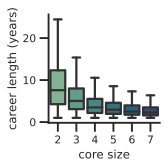

In [749]:
dfplot=pd.DataFrame()
for gsize in range(2,maxS):
    A=significant_cores3[gsize]
    x=pd.DataFrame()
    x['career length (years)']=list(A[(A['persistance_time']>1) &(A['persistance_time']<30)]['persistance_time'])
    x['core size']=gsize
    dfplot=pd.concat([dfplot,x])

label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

pal="crest"
ax=sns.boxplot(data=dfplot.dropna(), x="core size", y='career length (years)',showfliers=False,palette=pal);
sns.despine(ax=ax)
# plt.legend(bbox_to_anchor=(1, 1), title='core size')
plt.savefig('teamsfig_CareerLength.png',dpi=300, bbox_inches = "tight")


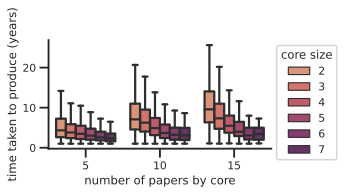

In [834]:
dfplot=pd.DataFrame()
for gsize in range(2,maxS):
    for W in [5,10,15]:
        A=significant_cores3[gsize]
    
        A=A[A['w']==W]
        x=pd.DataFrame()
        x['time taken to produce (years)']=list(A[(A['persistance_time']>1) &(A['persistance_time']<30)]['persistance_time'])
        x['core size']=gsize
        x['number of papers by core']=W
        dfplot=pd.concat([dfplot,x])
#     .hist(bins=30,density=True,alpha=.5,label=gsize)
    
# plt.legend();

label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

pal="flare"
ax=sns.boxplot(data=dfplot.dropna(), hue="core size", y='time taken to produce (years)',x='number of papers by core',showfliers=False,palette=pal);
sns.despine(ax=ax)
plt.legend(bbox_to_anchor=(1, 1), title='core size')
plt.savefig('teamsfig_ProductionRate.png',dpi=300, bbox_inches = "tight")

In [513]:
dfplot.groupby(by=["core size",'number of papers by core']).mean()

time taken to produce (years)
core size number of papers by core                               
2         5                                              5.758460
          10                                             8.344368
          15                                            10.756879
3         5                                              4.610772
          10                                             7.336159
          15                                             8.422918
4         5                                              4.331388
          10                                             5.850947
          15                                             6.535148
5         5                                              3.789448
          10                                             4.442822
          15                                             4.957639
6         5                                              3.266036
          10                                             4.096915
          15                                             4.738167
7         5                                              2.943145
          10                                             3.780782
          15                                             3.516538

# 9. Cores by Decades

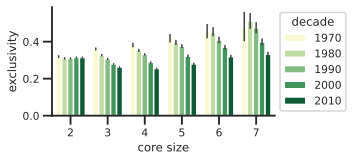

In [894]:
decades=[1970,1980,1990,2000,2010]
dfplot=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]    
    A=A[A['work_counts_UNION']>0]
    A=A[A['exclusivity']<=1]
    for d in decades:
    #     significant_cores3[gsize]['first_paper_pubyear'].hist(bins=50)

    
        B=A[(A['first_paper_pubyear']>=d)&(A['first_paper_pubyear']<d+10)]
    
        x=pd.DataFrame()
        x['exclusivity']=list(B['exclusivity'])
        x['core size']=gsize
        x['decade']=d
        dfplot=pd.concat([dfplot,x])
#     A[A['first_paper_pubyear']>1950]['first_paper_pubyear'].hist(bins=50)

label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

pal=['#ffffcc','#c2e699','#78c679','#31a354','#006837']
# ax=sns.boxplot(data=dfplot, x="core size", y='exclusivity',hue='decade',showfliers=False,palette=pal);
ax=sns.barplot(data=dfplot, x="core size", y='exclusivity',hue='decade',palette=pal,errwidth=1.5);
sns.despine(ax=ax)
plt.legend(bbox_to_anchor=(1, 1), title='decade')
plt.savefig('teamsfig_ExclusivityByDecades.png',dpi=300, bbox_inches = "tight")

# 10. Correlation check betweeen all quantities

In [669]:
props=['c5_first',
       'c5_av', 'core_diversity', 'exclusivity']

for i in range(len(props)):
    for j in range(i+1,len(props)):
        print(props[i],', ',props[j],'---')       
        for gsize in range(2,maxS):
            A=significant_cores3[gsize].dropna()
            A=A[A['w']>10]
            A=A[A['persistance_time']>=1]
            A=A[A['c5_av']>=0]
            r,p=stats.spearmanr(A[props[i]],A[props[j]])
            print('core size = ',gsize,r', r=',round(r,2),r', p=',round(p,3))       


c5_first ,  c5_av ---
core size =  2 , r= 0.48 , p= 0.0
core size =  3 , r= 0.51 , p= 0.0
core size =  4 , r= 0.55 , p= 0.0
core size =  5 , r= 0.57 , p= 0.0
core size =  6 , r= 0.54 , p= 0.0
core size =  7 , r= 0.48 , p= 0.0
c5_first ,  core_diversity ---
core size =  2 , r= -0.17 , p= 0.0
core size =  3 , r= -0.18 , p= 0.0
core size =  4 , r= -0.18 , p= 0.0
core size =  5 , r= -0.17 , p= 0.0
core size =  6 , r= -0.13 , p= 0.023
core size =  7 , r= -0.17 , p= 0.057
c5_first ,  exclusivity ---
core size =  2 , r= -0.08 , p= 0.0
core size =  3 , r= -0.09 , p= 0.0
core size =  4 , r= -0.12 , p= 0.0
core size =  5 , r= -0.13 , p= 0.0
core size =  6 , r= -0.13 , p= 0.022
core size =  7 , r= -0.24 , p= 0.006
c5_av ,  core_diversity ---
core size =  2 , r= -0.15 , p= 0.0
core size =  3 , r= -0.12 , p= 0.0
core size =  4 , r= -0.11 , p= 0.0
core size =  5 , r= -0.09 , p= 0.003
core size =  6 , r= -0.08 , p= 0.179
core size =  7 , r= -0.08 , p= 0.4
c5_av ,  exclusivity ---
core size =  2 , r= 

c5 first and c5 average are correlated, dynamics of citations.

# 11. Elite scientist cores

In [1052]:
gsize=2
A=significant_cores3[gsize]
A=A[A['w']>=5]
A=A[A['persistance_time']>=1]
G=A.sort_values(by=['c5_av'],ascending=False)


In [1081]:
x['display_na']

'Neva C. Durand'

In [ ]:
it=15
core=G.iloc[it][0]
print(core)

In [ ]:

it=15
core=G.iloc[it][0]
for a in core:
    l='https://api.openalex.org/authors/'+a.split('/')[-1]
    headers = {
        'User-Agent': 'chowdhary_sandeep',
        'From': 'chowdhary_sandeep@phd.ceu.edu'  # This is another valid field
    }

    x = requests.get(l)    
    x= x.json()
#     'display_name','2yr_mean_citedness'
    print(x['display_name'])
    print(x['summary_stats']['2yr_mean_citedness'])
    print(x['last_known_institution']['display_name'])
    print(x['last_known_institution']['country_code'])
    print('-------------')
print('num papers ',G.iloc[it]['w'])

In [1083]:
x

{'id': 'https://openalex.org/A1720417961',
 'orcid': None,
 'display_name': 'Edgar Simo-Serra',
 'display_name_alternatives': [],
 'works_count': 76,
 'cited_by_count': 4082,
 'summary_stats': {'2yr_mean_citedness': 1.85, 'h_index': 19, 'i10_index': 28},
 'ids': {'openalex': 'https://openalex.org/A1720417961', 'mag': '1720417961'},
 'last_known_institution': {'id': 'https://openalex.org/I150744194',
  'ror': 'https://ror.org/00ntfnx83',
  'display_name': 'Waseda University',
  'country_code': 'JP',
  'type': 'education'},
 'x_concepts': [{'id': 'https://openalex.org/C41008148',
   'wikidata': 'https://www.wikidata.org/wiki/Q21198',
   'display_name': 'Computer science',
   'level': 0,
   'score': 100.0},
  {'id': 'https://openalex.org/C154945302',
   'wikidata': 'https://www.wikidata.org/wiki/Q11660',
   'display_name': 'Artificial intelligence',
   'level': 1,
   'score': 90.8},
  {'id': 'https://openalex.org/C31972630',
   'wikidata': 'https://www.wikidata.org/wiki/Q844240',
   'disp

In [1059]:
G['w'].mean()

14.782139859567238

# career age

In [ ]:
def cal_ages(la):
    xauths=list(la.iloc[:,0])
    xpapers=list(la.iloc[:,6])
    ll_ages=[]
    for it in range(len(xpapers)):
        print(it/len(xpapers),end='\r')
        list_ages=[]
#         for it_paper in range(len(xpapers[it])):
        ages=[]
        try: 
            pub_time=int(dict_pubyear['https://openalex.org/'+xpapers[it][0]])
        except:
            pub_time=np.nan

        for it_auth in range(len(xauths[it])):
            try: 
                first_pub=int(dict_firstpub[xauths[it][it_auth]].split('-')[0])
            except:
                first_pub=np.nan
            ages.append(pub_time-first_pub)
        list_ages.append(ages)
        ll_ages.append(list_ages)
    return ll_ages



# c5 within discipline

In [17]:
with open(path_career+'dict_c5_within.pkl', 'rb') as f:
    dict_c5_within=pickle.load(f) 
    
with open(path_career+'dict_c5_within_lvl1.pkl', 'rb') as f:
    dict_c5_within_lvl1=pickle.load(f) 

In [18]:
def plot_c5within_coresize(TS):

    significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
    nonsignificant_cores3_sample2=nonsignificant_cores3_sample[nonsignificant_cores3_sample['size']==(TS,)]

    ups=[]
    for x in significant_cores3_sample2['papers_shared']:
        ups+=x
    ups=np.unique(ups)
    #______________________
    upns=[]
    for x in nonsignificant_cores3_sample2['papers_shared']:
        upns+=x
    upns=np.unique(upns)
    #______________________
    upns=set(upns).difference(set(ups))
    
    ups_cites=[]                
    for p in ups:
            try:
                ups_cites.append(dict_c5_within["https://openalex.org/"+p]/dict_c5["https://openalex.org/"+p])
            except:
                ups_cites.append(np.nan)
    upns_cites=[]                
    for p in upns:
            try:
                upns_cites.append(dict_c5_within["https://openalex.org/"+p]/dict_c5["https://openalex.org/"+p])
            except:
                upns_cites.append(np.nan)
    #______________________
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=FutureWarning)
    pd.options.mode.chained_assignment = None  # default='warn'

    y1=np.array(ups_cites)
#     y1=y1[~np.isnan(y1) ]
    y1=y1[~np.isnan(y1) & (y1>0)]
    print('c5 ratio persistent=',np.nanmean(y1))
    # 
    y2=np.array(upns_cites)
#     y2=y2[~np.isnan(y2) ]
    y2=y2[~np.isnan(y2) & (y2>0)]
    print('c5 ratio non-persistent',np.nanmean(y2))
    # plt.boxplot(,showfliers=False)
    import seaborn as sns
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['x']=[]
    for data_ in [y1,y2]:
        it_+=1
        df_=pd.concat([df_, pd.DataFrame(data_)])
#         df_=df_.append()
        rows_=pd.DataFrame(data_).shape[0]
        if it_==0:
            df_['x'].iloc[row_:row_+rows_]='persistent'
        else:
            df_['x'].iloc[row_:row_+rows_]='non-persistent'
        row_=row_+rows_
    df_.columns=['type','c5_within/c5']
    df_['c5_within/c5']=df_['c5_within/c5']
    sns.set(font_scale = 1.5)
    sns.set(rc={'figure.figsize':(4,2)})
    sns.boxplot(data=df_, x="c5_within/c5", y="type",showfliers=False,showmeans=True )
    return df_


def plot_c5within_coresize_lvl1(TS):

    significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
    nonsignificant_cores3_sample2=nonsignificant_cores3_sample[nonsignificant_cores3_sample['size']==(TS,)]

    ups=[]
    for x in significant_cores3_sample2['papers_shared']:
        ups+=x
    ups=np.unique(ups)
    #______________________
    upns=[]
    for x in nonsignificant_cores3_sample2['papers_shared']:
        upns+=x
    upns=np.unique(upns)
    #______________________
    upns=set(upns).difference(set(ups))
    
    ups_cites=[]                
    for p in ups:
            try:
                ups_cites.append(dict_c5_within_lvl1["https://openalex.org/"+p]/dict_c5["https://openalex.org/"+p])
            except:
                ups_cites.append(np.nan)
    upns_cites=[]                
    for p in upns:
            try:
                upns_cites.append(dict_c5_within_lvl1["https://openalex.org/"+p]/dict_c5["https://openalex.org/"+p])
            except:
                upns_cites.append(np.nan)
    #______________________
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=FutureWarning)
    pd.options.mode.chained_assignment = None  # default='warn'

    y1=np.array(ups_cites)
#     y1=y1[~np.isnan(y1) ]
    y1=y1[~np.isnan(y1) & (y1>0)]
    print('c5 ratio persistent=',np.nanmean(y1))
    # 
    y2=np.array(upns_cites)
#     y2=y2[~np.isnan(y2) ]
    y2=y2[~np.isnan(y2) & (y2>0)]
    print('c5 ratio non-persistent',np.nanmean(y2))
    # plt.boxplot(,showfliers=False)
    import seaborn as sns
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['x']=[]
    for data_ in [y1,y2]:
        it_+=1
        df_=pd.concat([df_, pd.DataFrame(data_)])
#         df_=df_.append()
        rows_=pd.DataFrame(data_).shape[0]
        if it_==0:
            df_['x'].iloc[row_:row_+rows_]='persistent'
        else:
            df_['x'].iloc[row_:row_+rows_]='non-persistent'
        row_=row_+rows_
    df_.columns=['type','c5_within/c5']
    df_['c5_within/c5']=df_['c5_within/c5']
    sns.set(font_scale = 1.5)
    sns.set(rc={'figure.figsize':(4,2)})
    sns.boxplot(data=df_, x="c5_within/c5", y="type",showfliers=False,showmeans=True )
    return df_


c5 ratio persistent= 0.9500748663488042
c5 ratio non-persistent 0.936660006179778


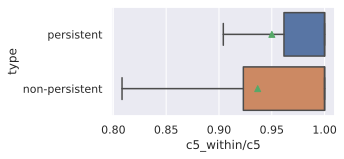

In [19]:
df_temp=plot_c5within_coresize(5)

c5 ratio persistent= 0.8013509899554948
c5 ratio non-persistent 0.789141670876392


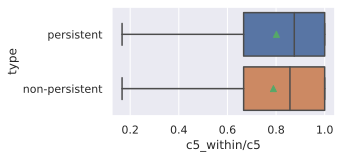

In [9]:
df_temp2=plot_c5within_coresize_lvl1(2)

# Fig 0 : Geography

# Fig 1: Career age

In [21]:
def cal_ages(la):
    xauths=list(la.iloc[:,0])
    xpapers=list(la.iloc[:,6])
    ll_ages=[]
    for it in range(len(xpapers)):
        print(it/len(xpapers),end='\r')
        list_ages=[]
#         for it_paper in range(len(xpapers[it])):
        ages=[]
        try: 
            pub_time=int(dict_pubyear['https://openalex.org/'+xpapers[it][0]])
        except:
            pub_time=np.nan

        for it_auth in range(len(xauths[it])):
            try: 
                first_pub=int(dict_firstpub[xauths[it][it_auth]].split('-')[0])
            except:
                first_pub=np.nan
            ages.append(pub_time-first_pub)
        list_ages.append(ages)
        ll_ages.append(list_ages)
    return ll_ages



In [23]:
def violin_age(l_l,l_lns):

    dict_ll_ages_s={0:l_l,1:l_lns}
    dict_y={}
    for it_sns in range(2):
        y={x:[] for x in range(len(l_l[0][0]))}
        l_l= dict_ll_ages_s[it_sns]
        for it in range(len(l_l)):
            try:
                x=sorted(l_l[it][0])
                for it_ in range(len(x)):
                    y[it_].append(x[it_])
            except:
                1
        for k in y.keys():
            y[k]=np.array(y[k])
            y[k]=y[k][~np.isnan(y[k]) & (y[k]<50) & (y[k]>=0)]
            print('age=',k,'th oldest----',np.mean(y[k]))
        dict_y[it_sns]=y
    import seaborn as sns
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['member']=[]
    df_['']=[]
    for it_sns in range(2):
        it_=-1
        y=dict_y[it_sns]
        for data_ in [y[k] for k in y.keys()]:
            it_+=1
            df_=pd.concat([df_, pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            df_['member'].iloc[row_:row_+rows_]=str(it_)
            df_[''].iloc[row_:row_+rows_]=str(it_sns)

            row_=row_+rows_
    df_.columns=['member','','age']
    return df_

age= 0 th oldest---- 7.53748295450652
age= 1 th oldest---- 13.773110282935308
age= 2 th oldest---- 22.832181174648824
age= 0 th oldest---- 9.384765214172129
age= 1 th oldest---- 16.31346792551405
age= 2 th oldest---- 24.9339572180886


AttributeError: 'AxesSubplot' object has no property 'palette'

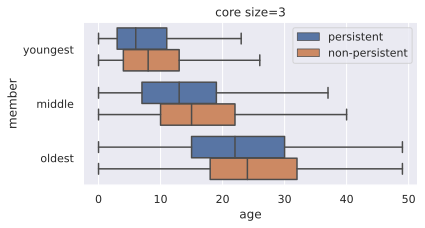

In [24]:

TS=3
significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
nonsignificant_cores3_sample2=nonsignificant_cores3_sample[nonsignificant_cores3_sample['size']==(TS,)]

ll_ages_s=cal_ages(significant_cores3_sample2)
ll_ages_ns=cal_ages(nonsignificant_cores3_sample2)
#
df_=violin_age(ll_ages_s,ll_ages_ns)
df_['']=df_[''].replace({'0':'persistent','1':'non-persistent'})
df_['member']=df_['member'].replace({'0':'youngest','1':'middle',str(df_['member'].nunique()-1):'oldest'})

sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(6,3)})
# sns.violinplot(data=df_, x="age", y="member", hue="type")
pal='rocket'
sns.boxplot(data=df_, x="age", y="member", hue="",showfliers=False).set(title='core size='+str(TS),palette=pal)
plt.xlabel("career age")
# sns.boxplot(data=df_, x="c5", y="type",showfliers=False)


In [ ]:
def violin_av_age_of_core_vs_coresize(L_timegap_s,L_timegap_ns,s_size,ns_size):
    dict_y={}
    
    for TS in range(2,6):
        dict_y[TS]={}
        inds=np.where(s_size['size']==(TS,))[0];indns=np.where(ns_size['size']==(TS,))[0];
        dict_y[TS]=[L_timegap_s[inds],L_timegap_ns[indns]]
#         dict_ll_ages_s={0:L_timegap_ns,1:L_timegap_ns}
    
    import seaborn as sns
    df_=pd.DataFrame()
    row_=0
    df_['coresize']=[]
    df_['']=[]
    for TS in range(2,6):
        for it_sns in range(2):
            data_=dict_y[TS][it_sns]
            df_=pd.concat([df_, pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            df_['coresize'].iloc[row_:row_+rows_]=str(TS)
            df_[''].iloc[row_:row_+rows_]=str(it_sns)

            row_=row_+rows_
    df_.columns=['coresize','','age']
    return df_

In [ ]:

L_ages_s=cal_ages(significant_cores3_sample)
L_ages_ns=cal_ages(nonsignificant_cores3_sample)
L_ages_s_av=np.array([np.mean(l) for l in L_ages_s])
L_ages_ns_av=np.array([np.mean(l) for l in L_ages_ns])
L_ages_s_std=np.array([np.nanvar(l)**.5 for l in L_ages_s])
L_ages_ns_std=np.array([np.nanvar(l)**.5 for l in L_ages_ns])




In [ ]:
df_av_ages=violin_av_age_of_core_vs_coresize(L_ages_s_av,L_ages_ns_av,significant_cores3_sample,nonsignificant_cores3_sample)
df_av_ages['']=df_av_ages[''].replace({'0':'persistent','1':'non-persistent'})

df_av_ages.columns=['core size','', 'career age (years)']
df_av_ages=df_av_ages[(df_av_ages['career age (years)']>=0) & (df_av_ages['career age (years)']<60)]

# df_=violin_timegaps(L_timegap_s,L_timegap_ns)
# df_timegaps['member']=df_timegaps['member'].replace({'0':'youngest','1':'middle',str(df_['member'].nunique()-1):'oldest'})
# df_av_ages['Time per paper (months)']=df_av_ages['Time per paper (years)']*12

sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(6,3)})
# sns.violinplot(data=df_, x="age", y="member", hue="type")
sns.boxplot(data=df_av_ages, x='career age (years)', y='core size', hue="",showfliers=False)
plt.legend(loc='upper right')
plt.tight_layout()

# sns.violinplot(data=df_av_ages, x='career age (years)', y='core size', hue="")
# plt.xlabel("career age")
# sns.boxplot(data=df_, x="c5", y="type",showfliers=False)
# print(df_timegaps.groupby(by='')['career age (years)'].mean())

In [ ]:
df_av_ages=violin_av_age_of_core_vs_coresize(L_ages_s_std,L_ages_ns_std,significant_cores3_sample,nonsignificant_cores3_sample)
df_av_ages['']=df_av_ages[''].replace({'0':'persistent','1':'non-persistent'})

df_av_ages.columns=['core size','', 'heterogenity in career age (years)']
df_av_ages=df_av_ages[(df_av_ages['heterogenity in career age (years)']>=0) & (df_av_ages['heterogenity in career age (years)']<60)]

# df_=violin_timegaps(L_timegap_s,L_timegap_ns)
# df_timegaps['member']=df_timegaps['member'].replace({'0':'youngest','1':'middle',str(df_['member'].nunique()-1):'oldest'})
# df_av_ages['Time per paper (months)']=df_av_ages['Time per paper (years)']*12

sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(6,3)})
# sns.violinplot(data=df_, x="age", y="member", hue="type")
sns.boxplot(data=df_av_ages, x='heterogenity in career age (years)', y='core size', hue="",showfliers=False)
plt.legend(loc='upper right')

plt.tight_layout()
# sns.violinplot(data=df_av_ages, x='career age (years)', y='core size', hue="")
# plt.xlabel("career age")
# sns.boxplot(data=df_, x="c5", y="type",showfliers=False)
# print(df_timegaps.groupby(by='')['career age (years)'].mean())

## Fig 1.1: Publishing speed (controlled by total number of papers by core- 10)

In [ ]:

L_timegap_s=cal_average_timegap_between_successive_paper_by_core(significant_cores3_sample)
L_timegap_ns=cal_average_timegap_between_successive_paper_by_core(nonsignificant_cores3_sample)

L_timegap_s=np.array(L_timegap_s)
L_timegap_ns=np.array(L_timegap_ns)
df_timegaps=violin_timegaps(L_timegap_s,L_timegap_ns,significant_cores3_sample,nonsignificant_cores3_sample)



In [ ]:
df_timegaps=violin_timegaps(L_timegap_s,L_timegap_ns,significant_cores3_sample,nonsignificant_cores3_sample)


In [ ]:
# df_=violin_timegaps(L_timegap_s,L_timegap_ns)
df_timegaps['']=df_timegaps[''].replace({'0':'persistent','1':'non-persistent'})
# df_timegaps['member']=df_timegaps['member'].replace({'0':'youngest','1':'middle',str(df_['member'].nunique()-1):'oldest'})
df_timegaps.columns=['core size','', 'Time per paper (years)']
df_timegaps['Time per paper (months)']=df_timegaps['Time per paper (years)']*12
df_timegaps=df_timegaps[(df_timegaps['Time per paper (years)']>=0) & (df_timegaps['Time per paper (years)']<20)]

sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(6,3)})
# sns.violinplot(data=df_, x="age", y="member", hue="type")
sns.boxplot(data=df_timegaps, x='Time per paper (months)', y='core size', hue="",showfliers=False).set(title='core size='+str(TS))
# plt.xlabel("career age")
# sns.boxplot(data=df_, x="c5", y="type",showfliers=False)
print(df_timegaps.groupby(by='')['Time per paper (months)'].mean())

In [ ]:
def violin_timegaps(L_timegap_s,L_timegap_ns,s_size,ns_size):
    dict_y={}
    
    for TS in range(2,5):
        dict_y[TS]={}
        inds=np.where(s_size['size']==(TS,))[0];indns=np.where(ns_size['size']==(TS,))[0];
        dict_y[TS]=[L_timegap_s[inds],L_timegap_ns[indns]]
#         dict_ll_ages_s={0:L_timegap_ns,1:L_timegap_ns}
    
    import seaborn as sns
    df_=pd.DataFrame()
    row_=0
    df_['coresize']=[]
    df_['']=[]
    for TS in range(2,5):
        for it_sns in range(2):
            data_=dict_y[TS][it_sns]
            df_=pd.concat([df_, pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            df_['coresize'].iloc[row_:row_+rows_]=str(TS)
            df_[''].iloc[row_:row_+rows_]=str(it_sns)

            row_=row_+rows_
    df_.columns=['coresize','','age']
    return df_

In [61]:
# df_=violin_timegaps(L_timegap_s,L_timegap_ns)
# df_['']=df_[''].replace({'0':'persistent','1':'non-persistent'})
# df_['member']=df_['member'].replace({'0':'youngest','1':'middle',str(df_['member'].nunique()-1):'oldest'})

# sns.set(font_scale = 1.5)
# sns.set(rc={'figure.figsize':(6,3)})
# # sns.violinplot(data=df_, x="age", y="member", hue="type")
# sns.boxplot(data=df_, x="age", y="member", hue="",showfliers=False).set(title='core size='+str(TS))
# plt.xlabel("career age")
# # sns.boxplot(data=df_, x="c5", y="type",showfliers=False)


1.0432385386997418

In [ ]:
# dict_pubyear

def cal_average_timegap_between_successive_paper_by_core(df_team):
    xcore=list(df_team.iloc[:,0])
    xpapers=list(df_team.iloc[:,6])
    list_timegap=[]
    for it in range(len(xcore)):
        print(it/len(xcore),end='\r')
        
        ages=[]
        for it_paper in range(len(xpapers[it])):
            try: 
                pub_time=int(dict_pubyear['https://openalex.org/'+xpapers[it][it_paper]])
            except:
                pub_time=np.nan

#             for it_auth in range(len(xauths[it])):
#                 try: 
#                     first_pub=int(dict_firstpub[xauths[it][it_auth]].split('-')[0])
#                 except:
#                     first_pub=np.nan
            ages.append(pub_time)
        ages=np.array(sorted(ages))
        if len(ages)>1:
            timegaps_=ages[1:-1]-ages[0:-2]
        else:
            timegaps_=np.nan
        list_timegap.append(np.nanmean(timegaps_))
    return list_timegap



## Fig 1.2: fraction of author papers in a core
by career age of auth in 2022

In [144]:
fracs_av=np.array([np.nanmean(frac) for frac in fracs])
fracns_av=np.array([np.nanmean(frac) for frac in fracns])


<ipython-input-144-62f873e036ae>:1: RuntimeWarning: Mean of empty slice
  fracs_av=np.array([np.nanmean(frac) for frac in fracs])
<ipython-input-144-62f873e036ae>:2: RuntimeWarning: Mean of empty slice
  fracns_av=np.array([np.nanmean(frac) for frac in fracns])



non-persistent     1.839661
persistent        13.556684
Name: % auth papers in core, dtype: float64


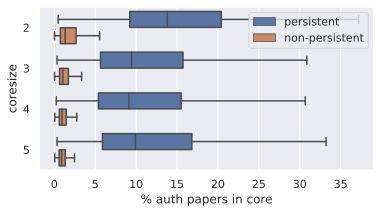

In [163]:
df_frac=violin_frac_auth_part_of_core(fracs_av,fracns_av,significant_cores3_sample,nonsignificant_cores3_sample)
df_frac['']=df_frac[''].replace({'0':'persistent','1':'non-persistent'})
# df_timegaps['member']=df_timegaps['member'].replace({'0':'youngest','1':'middle',str(df_['member'].nunique()-1):'oldest'})
# df_frac.columns=['core size','', 'Time per paper (years)']
if np.mean(df_frac['% auth papers in core']) <=1:
    df_frac['% auth papers in core']=df_frac['% auth papers in core']*100

sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(6,3)})
# sns.violinplot(data=df_, x="age", y="member", hue="type")
sns.boxplot(data=df_frac, x='% auth papers in core', y='coresize', hue="",showfliers=False)
# plt.xlabel("career age")
# sns.boxplot(data=df_, x="c5", y="type",showfliers=False)
print(df_frac.groupby(by='')['% auth papers in core'].mean())
plt.legend(loc='upper right')

In [154]:
def violin_frac_auth_part_of_core(fracs_av,fracns_av,s_size,ns_size):
    dict_y={}
    
    for TS in range(2,6):
        dict_y[TS]={}
        inds=np.where(s_size['size']==(TS,))[0];indns=np.where(ns_size['size']==(TS,))[0];
        dict_y[TS]=[fracs_av[inds],fracns_av[indns]]
#         dict_ll_ages_s={0:L_timegap_ns,1:L_timegap_ns}
    
    import seaborn as sns
    df_=pd.DataFrame()
    row_=0
    df_['coresize']=[]
    df_['']=[]
    for TS in range(2,6):
        for it_sns in range(2):
            data_=dict_y[TS][it_sns]
            df_=pd.concat([df_, pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            df_['coresize'].iloc[row_:row_+rows_]=str(TS)
            df_[''].iloc[row_:row_+rows_]=str(it_sns)

            row_=row_+rows_
    df_.columns=['coresize','','% auth papers in core']
    return df_


In [48]:
# Original calcualtion (run if you dont have the pickle file)
# ws=list(significant_cores3_sample['w'])
# auths=list(significant_cores3_sample['group'])
# fracs=[]
# for it in range(len(ws)):
#     fracs.append([])
#     print(it/len(ws),end='\r')
#     for x in auths[it]:
#         try:
#             fracs[it].append(ws[it]/dict_workcounts[x])
#         except:
#             fracs[it].append(np.nan)
# ws=list(nonsignificant_cores3_sample['w'])
# auths=list(nonsignificant_cores3_sample['group'])
# fracns=[]
# for it in range(len(ws)):
#     fracns.append([])
#     print(it/len(ws),end='\r')
#     for x in auths[it]:
#         try:
#             fracns[it].append(ws[it]/dict_workcounts[x])
#         except:
#             fracns[it].append(np.nan)

# with open(path_career+'fracs_auth_papers_in_core.pkl', 'wb') as f:
#     pickle.dump(fracs, f)
# with open(path_career+'fracns_auth_papers_in_core.pkl', 'wb') as f:
#     pickle.dump(fracns, f)

In [39]:
# dict_pubyear
def fraction_auth_paper_in_core(df_team):
    xcore=list(df_team.iloc[:,0])
    xpapers=list(df_team.iloc[:,6])
    list_timegap=[]
    for it in range(len(xcore)):
        print(it/len(xcore),end='\r')
        
        ages=[]
        for it_paper in range(len(xpapers[it])):
            try: 
                pub_time=int(dict_pubyear['https://openalex.org/'+xpapers[it][it_paper]])
            except:
                pub_time=np.nan

#             for it_auth in range(len(xauths[it])):
#                 try: 
#                     first_pub=int(dict_firstpub[xauths[it][it_auth]].split('-')[0])
#                 except:
#                     first_pub=np.nan
            ages.append(pub_time)
        ages=np.array(sorted(ages))
        timegaps_=ages[1:-1]-ages[0:-2]
        list_timegap.append(np.nanmean(timegaps_))
    return list_timegap



# Fig 2: Interdisciplinarity

In [15]:
# start_time = timeit.default_timer()
# names=path_career+'auth_concepts/a*'
# files=sorted(glob.glob(names))

# p=Pool(processes=5)
# df_disciplines = pd.concat(p.map(pd.read_csv,files),ignore_index=True)
# print(toc(start_time))
# p.close()

22.072451515123248
None


In [25]:
# # dict_disciplines=df_disciplines.groupby('auth_id')['cid'].apply(list).to_dict()
# with open(path_career+'dict_disciplines.pkl', 'wb') as f:
#     pickle.dump(dict_disciplines, f)

# import sys
# sys.getsizeof(dict_disciplines)/10**9

In [79]:
with open(path_career+'dict_disciplines.pkl', 'rb') as f:
    dict_disciplines=pickle.load(f) 


In [81]:
def get_dis_and_Jaccard(xauths):
    list_disciplines=[]
    for it in range(len(xauths)):
        print(it/len(xauths),end='\r')
        cc=[]
        for it_auth in range(len(xauths[it])):
            try: 
                cc.append(dict_disciplines[xauths[it][it_auth]])
            except:
                1
        list_disciplines.append(cc)
    #-------------------------------------------------        
    it=0
    store_jacc=[]
    for core in list_disciplines:
        if len(core)>0:
            Jacc=[]
            for ita in range(len(core)):
                for itb in range(ita+1,len(core)):
                    Jacc.append(len(set(core[ita]).intersection(set(core[itb])))/len(set(core[ita]).union(set(core[itb]))))
            store_jacc.append(np.mean(Jacc))
        else:
            store_jacc.append(np.nan)

        it+=1
        print(it/len(list_disciplines),end='\r')

    return list_disciplines,store_jacc


#-------------------------------------------------        
def plot_Jacc(store_jacc,store_jacc_ns,TS):
    y1=np.array(store_jacc)
    y1=y1[~np.isnan(y1) & (y1>0)]
    print('jaccard persistent=',np.nanmean(y1))
    # 
    y2=np.array(store_jacc_ns)
    #     y2=y2[~np.isnan(y2) ]
    y2=y2[~np.isnan(y2) & (y2>0)]
    print('jaccard non-persistent',np.nanmean(y2))
    # plt.boxplot(,showfliers=False)
    import seaborn as sns
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['x']=[]
    for data_ in [y1,y2]:
        it_+=1
        df_=pd.concat([df_, pd.DataFrame(data_)])
    #         df_=df_.append()
        rows_=pd.DataFrame(data_).shape[0]
        if it_==0:
            df_['x'].iloc[row_:row_+rows_]='persistent'
        else:
            df_['x'].iloc[row_:row_+rows_]='non-persistent'
        row_=row_+rows_
    df_.columns=['core type','mono-disciplinarity (Jaccard similarity)']
    sns.set(font_scale = 1.5)
    sns.set(rc={'figure.figsize':(4,2)})
    sns.boxplot(data=df_, x="mono-disciplinarity (Jaccard similarity)", y="core type",showfliers=False).set(title='core size='+str(TS))
#     sns.set(title=TS)
    return df_


## calculate Jacc 

In [75]:
# TS=2
# significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
# nonsignificant_cores3_sample2=nonsignificant_cores3_sample[nonsignificant_cores3_sample['size']==(TS,)]

# list_disciplines,store_jacc=get_dis_and_Jaccard(list(significant_cores3_sample2.iloc[:,0]))
# list_disciplines_ns,store_jacc_ns=get_dis_and_Jaccard(list(nonsignificant_cores3_sample2.iloc[:,0]))

# df_jacc=plot_Jacc(store_jacc,store_jacc_ns,TS)

0.00946314407045192455

/mnt/sdb1/sandeep/miniconda3/envs/sos/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/sdb1/sandeep/miniconda3/envs/sos/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


jaccard persistent= 0.8037934053565241
jaccard non-persistent 0.7135648564889323


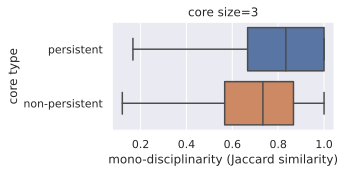

In [82]:
TS=3
significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
significant_cores3_sample2=significant_cores3_sample2[significant_cores3_sample2['w']<100]
nonsignificant_cores3_sample2=nonsignificant_cores3_sample[nonsignificant_cores3_sample['size']==(TS,)]


list_disciplines,store_jacc=get_dis_and_Jaccard(list(significant_cores3_sample2.iloc[:,0]))
list_disciplines_ns,store_jacc_ns=get_dis_and_Jaccard(list(nonsignificant_cores3_sample2.iloc[:,0]))

df_jacc=plot_Jacc(store_jacc,store_jacc_ns,TS)

# Fig 3: Interdisciplinarity vs Average c5

In [ ]:
len(store_jacc)


# Fig 4: Team-size over career (only persistent cores)

In [29]:
# start_time = timeit.default_timer()
# names=path_career+'paper_teamsize/*'
# files=sorted(glob.glob(names))

# p=Pool(processes=10)
# df_teamsize = pd.concat(p.map(pd.read_csv,files),ignore_index=True)
# print(toc(start_time))
# p.close()
# dict_teamsize=df_teamsize.set_index('paper_id')['TS'].T.to_dict()
# with open(path_career+'dict_teamsize.pkl', 'wb') as f:
#     pickle.dump(dict_teamsize, f)


In [85]:
with open(path_career+'dict_teamsize.pkl', 'rb') as f:
    dict_teamsize=pickle.load(f) 


In [95]:
teamsizes={}
for TS in range(2,6):
    significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
#     significant_cores3_sample2=significant_cores3_sample2[significant_cores3_sample2['w']<100]

    xpapers=list(significant_cores3_sample2['papers_shared'])
    teamsizes[TS]=[]
    for it in range(len(xpapers)):
        print(str(TS)+'-'+str(it/len(xpapers)),end='\r')
        list_ages=[]
        ts=[]
        for it_paper in range(len(xpapers[it])):
            try: 
                ts.append(int(dict_teamsize['https://openalex.org/'+xpapers[it][it_paper]]))
            except:
                ts.append(np.nan)

        teamsizes[TS].append(ts)



### average number of non-core members in teams

In [96]:
import seaborn as sns
def violin_teamsize(teamsizes):

    dict_y={}
    
    for TS in teamsizes.keys():
        dict_y[TS]=np.array([np.mean(x) for x in teamsizes[TS]])
        dict_y[TS]=dict_y[TS][~np.isnan(dict_y[TS]) & (dict_y[TS]>0)]
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['']=[]
    it_=-1
    for TS in teamsizes.keys():
        data_=dict_y[TS]
        it_+=1
        df_=pd.concat([df_, pd.DataFrame(data_)])
        rows_=pd.DataFrame(data_).shape[0]
        df_[''].iloc[row_:row_+rows_]=TS

        row_=row_+rows_
    df_.columns=['','number of non-core members']
    return df_

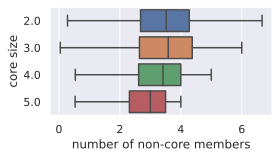

In [97]:
df_=violin_teamsize(teamsizes)
df_.columns=['core size','number of non-core members']
df_['number of non-core members']=df_['number of non-core members']-df_['core size']

df_['core size']=df_['core size'].astype('str')
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(data=df_, x='number of non-core members', y="core size",showfliers=False);
# return df_

In [ ]:
# df_=violin_teamsize(teamsizes)
# df_.columns=['core size','number of non-core members']
# df_['number of non-core members']=df_['number of non-core members']-np.array(teamsizes_coresize[1])

# df_['core size']=df_['core size'].astype('str')
# sns.set(font_scale = 1.5)
# sns.set(rc={'figure.figsize':(4,2)})
# sns.boxplot(data=df_, x='number of non-core members', y="core size",showfliers=False);
# # return df_

### number of non-core with career stage

In [99]:
def violin_teamsize_vs_career(teamsizes):
    dict_z={}
    for TS in teamsizes.keys():
        dict_z[TS]={}
    #         dict_y[TS]=np.array([np.mean(x) for x in teamsizes[TS]])

        dict_z[TS]['0']=np.array([np.mean(x[0:3]) for x in teamsizes[TS] if len(x)>15])
        dict_z[TS]['0']=dict_z[TS]['0'][~np.isnan(dict_z[TS]['0']) & (dict_z[TS]['0']>0)]
        dict_z[TS]['1']=np.array([np.mean(x[3:6]) for x in teamsizes[TS] if len(x)>13])
        dict_z[TS]['1']=dict_z[TS]['1'][~np.isnan(dict_z[TS]['1']) & (dict_z[TS]['1']>0)]
        dict_z[TS]['2']=np.array([np.mean(x[6:10]) for x in teamsizes[TS] if len(x)>13])
        dict_z[TS]['2']=dict_z[TS]['2'][~np.isnan(dict_z[TS]['2']) & (dict_z[TS]['2']>0)]
        dict_z[TS]['3']=np.array([np.mean(x[10:13]) for x in teamsizes[TS] if len(x)>13])
        dict_z[TS]['3']=dict_z[TS]['3'][~np.isnan(dict_z[TS]['3']) & (dict_z[TS]['3']>0)]

        
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['']=[]
    df_['career stage']=[]
    for TS in teamsizes.keys():
        for cs in ['0','1','2','3']:
            data_=dict_z[TS][cs]
            df_=pd.concat([df_, pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            df_[''].iloc[row_:row_+rows_]=TS
            df_['career stage'].iloc[row_:row_+rows_]=cs
            row_=row_+rows_
    df_.columns=['','number of non-core members','career stage']
    return df_

In [104]:
def violin_teamsize_increase_vs_career(teamsizes):
    dict_z={}
    for TS in teamsizes.keys():
        dict_z[TS]={}
    #         dict_y[TS]=np.array([np.mean(x) for x in teamsizes[TS]])

        dict_z[TS]['0']=np.array([np.mean(x[0:3]) for x in teamsizes[TS] if len(x)>15])
        dict_z[TS]['0']=dict_z[TS]['0'][~np.isnan(dict_z[TS]['0']) & (dict_z[TS]['0']>0)]
        dict_z[TS]['1']=np.array([np.mean(x[3:6])-np.mean(x[0:3]) for x in teamsizes[TS] if len(x)>13])
        dict_z[TS]['1']=dict_z[TS]['1'][~np.isnan(dict_z[TS]['1']) & (dict_z[TS]['1']>0)]
        dict_z[TS]['2']=np.array([np.mean(x[6:10])-np.mean(x[3:6]) for x in teamsizes[TS] if len(x)>13])
        dict_z[TS]['2']=dict_z[TS]['2'][~np.isnan(dict_z[TS]['2']) & (dict_z[TS]['2']>0)]
        dict_z[TS]['3']=np.array([np.mean(x[10:13])-np.mean(x[6:10]) for x in teamsizes[TS] if len(x)>13])
        dict_z[TS]['3']=dict_z[TS]['3'][~np.isnan(dict_z[TS]['3']) & (dict_z[TS]['3']>0)]

        
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['']=[]
    df_['career stage']=[]
    for TS in teamsizes.keys():
        for cs in ['1','2','3']:
            data_=dict_z[TS][cs]
            df_=pd.concat([df_, pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            df_[''].iloc[row_:row_+rows_]=TS
            df_['career stage'].iloc[row_:row_+rows_]=cs
            row_=row_+rows_
    df_.columns=['','number of non-core members','career stage']
    return df_

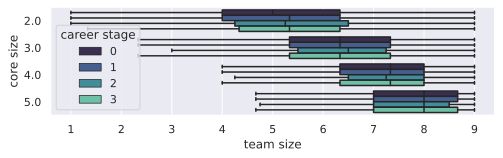

In [115]:
df_=violin_teamsize_vs_career(teamsizes)
df_.columns=['core size','career stage','team size']
# df_['number of non-core members']=df_['number of non-core members']-df_['core size'].astype('float')
df_['core size']=df_['core size'].astype('str')
df_['career stage']=df_['career stage'].replace({1:'paper 3-5',2:'paper 6-8',3:'paper 9-12'})
# df_['career stage']=df_['career stage'].astype('str')
# df_=df_[df_['number of non-core members']>0]
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(8,2)})
pal="mako"
sns.boxplot(data=df_, x='team size', y="core size",hue='career stage',showfliers=False,palette=pal);
# return df_

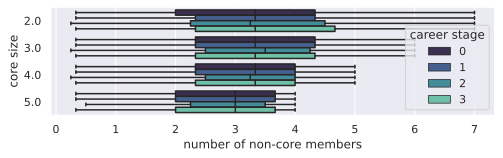

In [114]:
df_=violin_teamsize_vs_career(teamsizes)
df_.columns=['core size','career stage','number of non-core members']
df_['number of non-core members']=df_['number of non-core members']-df_['core size'].astype('float')
df_['core size']=df_['core size'].astype('str')
df_['career stage']=df_['career stage'].replace({1:'paper 3-5',2:'paper 6-8',3:'paper 9-12'})
# df_['career stage']=df_['career stage'].astype('str')
df_=df_[df_['number of non-core members']>0]
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(8,2)})
pal="mako"
sns.boxplot(data=df_, x='number of non-core members', y="core size",hue='career stage',showfliers=False,palette=pal);
# return df_

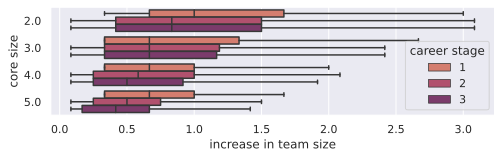

In [117]:
# df_=violin_teamsize_increase_vs_career(teamsizes)
# df_.columns=['core size','career stage','increase in team size']
# # df_['number of non-core members']=df_['number of non-core members']-df_['core size'].astype('float')
# df_['core size']=df_['core size'].astype('str')
# df_['career stage']=df_['career stage'].replace({1:'paper 3-5',2:'paper 6-8',3:'paper 9-12'})
# # df_['career stage']=df_['career stage'].astype('str')
# # df_=df_[df_['number of non-core members']>0]
# sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(8,2)})
pal="flare"
sns.boxplot(data=df_, x='increase in team size', y="core size",hue='career stage',showfliers=False,palette=pal);
# return df_

Larger persitent cores typically work in larger teams than smaller cores, attracting and inviting more external non-core human resource. Over the career of a persistent core, number of non-core members grow. The increases is maximal for small cores which perhaps take time to gather human resources in the career while larger persitent cores are able to achieve required levels of external collaborators early in their career, thus not needing to grow later. While the shift of science towards larger teams is well documented \cite{dashun- large teams develop, stasa -cores}, if individual teams grow or shrink within their careers is not clear. Here, we reveal that depending on the core group size, the growth rate of the team can change.

## Within discinpline c5 of each paper

# AFFILIATION OF EACH AUTH FOR EACH PAPER

In [28]:
# start_time = timeit.default_timer()
# names=path_career+'pap_auth_affil/*'
# files=sorted(glob.glob(names))

# p=Pool(processes=10)
# df_affil = pd.concat(p.map(pd.read_csv,files),ignore_index=True)
# print(toc(start_time))
# p.close()

In [29]:
# pids=list(df_affil['paper_id'])
# aids=list(df_affil['auth_id'])
# iids=list(df_affil['insti_id'])
# dict_affil={}
# for it in range(len(pids)):
#     dict_affil[pids[it]]={}
#     try:
#         dict_affil[pids[it]][aids[it]].append(iids[it])
#     except:
#         dict_affil[pids[it]][aids[it]]=[iids[it]]
#     print(it/len(pids),end='\r')
   
    
    



In [33]:
# with open(path_career+'dict_affil.pkl', 'rb') as f:
#     dict_affil=pickle.load(f) 

In [34]:
# dict_affil[list(dict_affil.keys())[0]]

In [256]:
TS=4
significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
significant_cores3_sample2=significant_cores3_sample2[significant_cores3_sample2['w']<100]


In [257]:
significant_cores3_sample2=significant_cores3_sample2.sort_values(by='w', ascending=False)

In [264]:
list(significant_cores3_sample2['group'])[102]

('https://openalex.org/A2024086968',
 'https://openalex.org/A254500108',
 'https://openalex.org/A2915082529',
 'https://openalex.org/A2915774777')

# Success
frequent publishing teams are more succesful
number of papers by team/ core,  distribution of time between successive papers, 
distribution of means/variances of the time-gap distribution.



SUCCESS OF PERSISTENT TEAMS vs NON-PERSISTENT--
- citation counts/ num_papers by team for 2 types
    - check inflation corrected by discipline citations, same pub year
    - single year, single discipline
- paper in high impact journals is another measure of success
    - number of papers of all papers in  nature by persistent vs non-persistent
    - citations of all papers in  nature by persistent vs non-persistent

- number of open_access papers is another dimension (Luca)


____________________________________
Authors who collaborate with succesful (non) persistent  teams are succesful? 
- right before entering the team -citations/ 5 years after the collab - status of scientist

____________________________________
Correlate Success with other team level demographics
- physical distance (same university)
- discipline distance between  members
- frequency of publishing together
- past shared success drives future collab?


____________________________________________________
a paper always features a team which consists of persistent members and non-persistent ones.
- Unless all are part of the core 
- OR non are.

18460402 total unique paper_ids in BigQuery Table paper_refs
77093477



## Fig 0: career

## Fig 1: career age

### divide persistent cores by size
    - pairs: build classifiers - age of younger <5, age older>10 (how many such pairs, authorship positions?)
    - triads: build classifiers - age of youngest <5, age older>3-10, age oldest>10  (how many such cases, authorship positions?)

## Fig 2: number of nature / science papers per team
disciplinewise

In [57]:
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open(path_career+'works_nature_science.pkl', 'rb') as f:
    works_nature_science=pickle.load(f)
with open(path_career+'works_nature_others.pkl', 'rb') as f:
    works_nature_others=pickle.load(f) 

In [58]:
nature_venues=list(works_nature_others.keys())

In [59]:
headers = {
    'User-Agent': 'chowdhary_sandeep',
    'From': 'chowdhary_sandeep@phd.ceu.edu'  # This is another valid field
}

In [60]:
# nature_others_works

In [61]:
nature_others_works={}
for venue in works_nature_others.keys():
    url='https://api.openalex.org/journals/'+venue;response = requests.get(url, headers=headers)
    x= response.json();print(x['display_name'])
    nature_others_works[venue]=[works_nature_others[venue][x]['id'].split('/')[3] for x in range(len(works_nature_others[venue]))]


Nature Communications
Nature Genetics
Nature Medicine
Nature Biotechnology
Nature Materials
Nature Neuroscience
Nature Methods
Nature Immunology
Nature Nanotechnology
Nature Reviews Cancer
Nature Cell Biology
Nature Reviews Neuroscience
Nature Reviews Immunology
Nature Protocols
Nature Reviews Genetics
Nature Photonics
Nature Reviews Molecular Cell Biology
Nature Physics
Nature Structural & Molecular Biology
Nature Reviews Microbiology
Nature Chemistry
Nature Reviews Drug Discovery
Nature Geoscience
Nature Chemical Biology


In [63]:

ups=[]
for x in significant_cores3_sample['papers_shared']:
    ups+=x
ups=np.unique(ups)
#______________________
upns=[]
for x in nonsignificant_cores3_sample['papers_shared']:
    upns+=x
upns=np.unique(upns)

In [64]:
dict_in_nature={}
set_ups=set(ups)
set_upns=set(upns)
for venue in works_nature_others.keys():
    upns_not_in_ups=set_upns.difference(set_ups)
    dict_in_nature[venue]=(len(set(nature_others_works[venue]) & set_ups)/len(set_ups))/(len(set(nature_others_works[venue]) & set_upns)/len(upns_not_in_ups))
    print('persistent:',len(set(nature_others_works[venue]) & set_ups)/len(ups))
    print('non-persistent:',len(set(nature_others_works[venue]) & upns_not_in_ups)/len(upns_not_in_ups))

persistent: 0.0006452291936465517
non-persistent: 0.0006125615372284365
persistent: 5.1928714012257164e-05
non-persistent: 0.00014071869534910205
persistent: 6.844244298933512e-05
non-persistent: 0.00010916579201051474
persistent: 4.098588155756696e-05
non-persistent: 9.610941821523722e-05
persistent: 8.595097491683945e-05
non-persistent: 6.709525422573165e-05
persistent: 5.6504807584218526e-05
non-persistent: 0.00012040878055644815
persistent: 2.785448261193871e-05
non-persistent: 6.419383782678108e-05
persistent: 3.063993087313258e-05
non-persistent: 9.284532476641784e-05
persistent: 5.5510004633792145e-05
non-persistent: 4.3158568934389545e-05
persistent: 2.0095019598612927e-05
non-persistent: 3.0827549238849674e-05
persistent: 2.168670431929514e-05
non-persistent: 8.26903673700909e-05
persistent: 1.989605900852765e-05
non-persistent: 3.989447548557017e-05
persistent: 1.9299177238271822e-05
non-persistent: 4.1707860734914264e-05
persistent: 3.680770916577615e-05
non-persistent: 6.99

dict_values([0.4247012842402966, 0.24475503076826044, 0.3418742183894493, 0.2742944310333953, 0.43325482342386396, 0.2923062604633556, 0.30844353690502285, 0.2308270075362999, 0.4360578134377054, 0.3718622487835293, 0.19351516493618184, 0.3246087941223613, 0.2989501102274084, 0.3242458130426718, 0.2042618103440178, 0.5792139684443057, 0.15000476697138806, 0.4483853614309747, 0.20990606694104902, 0.31145690233469403, 0.43759033744627274, 0.3747402790174556, 0.42174123981024025, 0.2572478844719979])

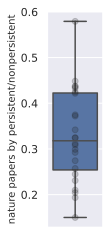

In [184]:
# plt.boxplot(dict_in_nature.values())
plt.ylabel('nature papers by persistent/nonpersistent',fontsize=10)
# plt.yticks([])
plt.xticks([])

sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(.5,4)})
# sns.violinplot(data=df_, x="age", y="member", hue="type")
pal='rocket'
sns.boxplot(  y=list(dict_in_nature.values()))
plt.plot([0 for it in range(24)],dict_in_nature.values(),'o',color='k',alpha=.2)

# plt.xlabel("career age")


### Time to win first nature paper. 

## Fig 3: displinary variation in core
    - requirements:
        a) {auth: discipline scores} (threshold .75), a dictionary
            - download table from bigquery, filter by threshold, groupby author, make dictionary
            
        b) add scores to each core, a column in significant_cores_sample and nonsingi...


In [200]:
start_time = timeit.default_timer()
names=path_data+'openalex_ACTIV/auth_concepts/a*'
files=sorted(glob.glob(names))

p=Pool(processes=5)
df_disciplines = pd.concat(p.map(pd.read_csv,files),ignore_index=True)
print(toc(start_time))
p.close()

24.68164100125432
None


In [8]:
df_disciplines0=df_disciplines[df_disciplines['clevel']==0]

In [ ]:
# aid=np.array(df_disciplines0['auth_id'])
# cid=list(df_disciplines0['cid'])
# ind=np.where(aid[0:len(aid)-1]!=aid[1:len(aid)])[0]

# dict_aconc={}
# ind=np.insert(ind,0,-1)
# ind=np.insert(ind,len(ind),en(aid))
# for itc in range(len(ind)-1):
#     print(itc/len(ind),end='\r')
#     dict_aconc[aid[ind[itc]+1]]=cid[ind[itc]+1:ind[itc+1]+1]
    


In [13]:
# dict_aconc['https://openalex.org/A2106175861']

In [ ]:
# for core in cores_:
#     print(core)
#     print([dict_aconc[x] if x in dict_aconc.keys() else -1 for x in core])
#     break

In [20]:
cores_=np.array(significant_cores3_sample['group'])
it=0
sig_disp=[]
for core in cores_:
    it+=1
    sig_disp.append([dict_aconc[x] if x in dict_aconc.keys() else -1 for x in core])
    print(it/len(cores_),end='\r')
    

In [21]:
significant_cores3_sample.head()

,group,pvalue,w,fdr,ni,N,papers_shared
107,"(https://openalex.org/A2106175861, https://ope...",5.611704e-180,20,True,"(21, 32, 26, 31, 20, 24, 24, 31, 29)",396,"[W1991604864, W1594884475, W1531537719, W15280..."
299,"(https://openalex.org/A1763957276, https://ope...",3.051776e-222,16,True,"(108, 99, 115, 52, 51, 88, 81, 50, 45)",5203,"[W561035096, W589855545, W566292719, W36291422..."
317,"(https://openalex.org/A2020393399, https://ope...",0.000000e+00,29,True,"(50, 50, 152, 124, 48, 51, 38, 57, 30)",11642,"[W2504314658, W2501537110, W2489679359, W24929..."
331,"(https://openalex.org/A2118747090, https://ope...",8.145376e-299,20,True,"(25, 53, 23, 28, 21, 24, 50, 21, 46)",2586,"[W3179902792, W3182511914, W3182550861, W31780..."
367,"(https://openalex.org/A2064049883, https://ope...",8.190394e-226,31,True,"(31, 31, 31, 31, 31, 31, 31, 31, 31)",279,"[W2099856131, W1893874433, W2111156550, W21720..."


In [23]:
# sig_disp

## Fig 4: non-core members 
    - experts?
    - new first-time authors? what is the major channel (core teams or non-core) via which new authorsare included in academia?
    - first author?
    - qualifications? distance from cores expertise
    

- Age distribution of non-core members. 

- fraction of paper with core team, non-core team
- h-index of the author (correlate)

success meastric for each author

# basic 
for each paper,  fraction of non-core members
for each author, how many cores is she part of?
    - how overlapping are these cores?


# Idea
## Measure of success of a team
    - within discipline c5, outside discipline c5
    - 
    - are persistent teams forming the core of the collabroations network of the discipline
disciplinary separations: entropy of cores:  dsicpline

# Giorgio Parisi's id 
https://openalex.org/A2163147449

In [351]:
# scientist='https://openalex.org/A4335291810' # fede
scientist='https://openalex.org/A4353661633' # parisi
# scientist='https://openalex.org/A4349481004' # dhar
# scientist='https://openalex.org/A4337235076' #Gerardo
# scientist='https://openalex.org/A4354965935' # marton 
# scientist='https://openalex.org/A4359848682' # alex arenas
scientist='https://openalex.org/A4359200259' # timoteo
scientist='https://openalex.org/A2188387283' #lambiotte
# scientist='https://openalex.org/A2054945303' #vito
# scientist='https://openalex.org/A4348980809' #roberta 
# scientist='https://openalex.org/A4359926056' #BARABASI


In [352]:
# list(significant_cores3[size].iloc[ind_Parisi,0])[1]
# uas=[]
dfshow=pd.DataFrame()
it=0;ind_Parisi=[]
for gsize in range(2,maxS):
    all_=list(significant_cores3[gsize]['group'])
    print(gsize,it)
    for it1 in range(len(all_)):
        x=all_[it1]
        if scientist in x:
            ind_Parisi.append([gsize,it])
            it=it+1
#             print(x)
#             print(significant_cores3[gsize].iloc[it1:it1+1])
            dfshow=pd.concat([dfshow,significant_cores3[gsize].iloc[it1:it1+1]])


2 0
3 0
4 0
5 1
6 1
7 1
8 1
9 1


In [353]:
dfshow

,group,pvalue,w,fdr,ni,N,size,member_first_pub,first_paper_pubyear,last_paper_pubyear,is_formed_in_one_shot,time_taken_to_accumulatev2,c5_first,c5_av,work_counts_UNION,exclusivity,core_diversity
62894175,"(https://openalex.org/A2188387283, https://ope...",0.0,5,True,"(131, 143, 49, 90)",30810,4,"[1970, 1996, 2010, 2004]",2012.642,2019.472,False,2.086,2.066559,2.747771,65,0.076923,1.118043


In [354]:
for x in range(dfshow.shape[0]):
    print(dfshow.iloc[x][0],'\n')

('https://openalex.org/A2188387283', 'https://openalex.org/A4353859975', 'https://openalex.org/A4353881740', 'https://openalex.org/A4359083607') 



In [32]:
# maximal : never published with enzo alone, vito always coauthors

# testing effect of total possinle papers on hypergeomtric dsitribution


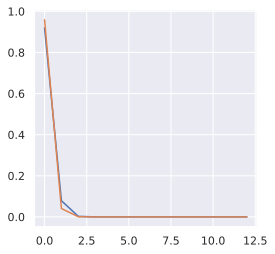

In [169]:
import numpy as np
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
[N, K, n] = [1000, 7, 12];rv = hypergeom(N, K, n);x = np.arange(0, n+1);pmf_dogs = rv.pmf(x)
plt.plot(pmf_dogs)
def p_over(t):
    w,n,na,nb = t
    return st.hypergeom.sf(w-1,n,na,nb)

[N, K, n] = [2000, 7, 12];rv = hypergeom(N, K, n);x = np.arange(0, n+1);pmf_dogs = rv.pmf(x)
plt.plot(pmf_dogs)
